In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [3]:
file_path = "dia_filtered.csv"
df = pd.read_csv(file_path)

df.head()

,Показник,Тип товарів і послуг,Базисний період,Територіальний розріз,Періодичність,2019-M01,2019-M02,2019-M03,2019-M04,2019-M05,...,2024-M03,2024-M04,2024-M05,2024-M06,2024-M07,2024-M08,2024-M09,2024-M10,2024-M11,2024-M12
0,Індекс споживчих цін,Хліб і хлібопродукти,До відповідного місяця попереднього року,Україна,Місячна,114.1,114.1,114.3,114.5,115.1,...,97.7,97.9,99.2,100.8,103.0,105.5,107.8,109.7,112.2,114.8
1,Індекс споживчих цін,Хліб,До відповідного місяця попереднього року,Україна,Місячна,120.9,120.4,120.0,119.3,120.2,...,105.2,105.7,106.5,107.4,110.1,112.2,113.3,114.4,115.8,118.2
2,Індекс споживчих цін,Макаронні вироби,До відповідного місяця попереднього року,Україна,Місячна,114.2,113.8,113.7,113.6,113.0,...,99.6,99.4,100.1,100.9,101.8,103.9,105.0,106.1,108.6,110.8
3,Індекс споживчих цін,М’ясо та м’ясопродукти,До відповідного місяця попереднього року,Україна,Місячна,108.6,107.9,107.1,105.6,107.6,...,107.7,104.2,102.9,100.4,99.3,99.3,99.7,100.3,101.9,103.1
4,Індекс споживчих цін,Риба та продукти з риби,До відповідного місяця попереднього року,Україна,Місячна,110.7,109.5,108.5,108.5,108.4,...,104.5,105.1,105.4,106.4,105.9,106.7,108.0,109.3,111.1,112.1


In [4]:
# Redo QR decomposition with explicit handling
A_corrected = np.array([[1, 2, 2],
                        [-2, -4, 2],
                        [2, 4, 1],
                        [0, 0, -6]], dtype=float)

# Compute QR decomposition again
Q_corrected, R_corrected = np.linalg.qr(A_corrected, mode='reduced')

Q_corrected, R_corrected


(array([[-0.33333333,  0.66666667,  0.        ],
        [ 0.66666667,  0.66666667,  0.        ],
        [-0.66666667,  0.33333333,  0.        ],
        [-0.        ,  0.        ,  1.        ]]),
 array([[-3., -6.,  0.],
        [ 0.,  0.,  3.],
        [ 0.,  0., -6.]]))

In [5]:
df.info(), df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 77 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Показник               680 non-null    object 
 1   Тип товарів і послуг   680 non-null    object 
 2   Базисний період        680 non-null    object 
 3   Територіальний розріз  680 non-null    object 
 4   Періодичність          680 non-null    object 
 5   2019-M01               654 non-null    float64
 6   2019-M02               654 non-null    float64
 7   2019-M03               654 non-null    float64
 8   2019-M04               654 non-null    float64
 9   2019-M05               654 non-null    float64
 10  2019-M06               654 non-null    float64
 11  2019-M07               654 non-null    float64
 12  2019-M08               654 non-null    float64
 13  2019-M09               654 non-null    float64
 14  2019-M10               654 non-null    float64
 15  2019-M

(None,
 Показник                  0
 Тип товарів і послуг      0
 Базисний період           0
 Територіальний розріз     0
 Періодичність             0
                          ..
 2024-M08                 48
 2024-M09                 48
 2024-M10                 48
 2024-M11                 48
 2024-M12                 48
 Length: 77, dtype: int64)

In [6]:

df = df.copy()
df.iloc[:, 5:] = df.iloc[:, 5:].interpolate(method='linear', axis=1)

missing_values_after = df.isnull().sum().sum()
missing_values_after


936

In [7]:
#Середні споживчі ціни на товари (послуги)
def analyze_avg_price(categories, title):
    filtered_df = df[(df["Показник"] == "Середні споживчі ціни на товари (послуги)") & 
                     (df["Тип товарів і послуг"].isin(categories))]
    
    filtered_df = filtered_df.iloc[:, 5:].astype(float)
    filtered_df = filtered_df.mean(axis=0)
    
    filtered_df = pd.DataFrame(filtered_df, columns=["Середня ціна (грн)"])
    
    filtered_df.index = filtered_df.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
    filtered_df.index = pd.to_datetime(filtered_df.index, format="%Y-%m")
    
    plt.figure(figsize=(10, 5))
    plt.plot(filtered_df.index, filtered_df["Середня ціна (грн)"], color="blue", linestyle='dashed', label=f"{title}")
    plt.title(f"Динаміка середніх споживчих цін: {title}")
    plt.xlabel("Дата")
    plt.ylabel("Середня ціна (грн)")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()


    yearly_avg = filtered_df.resample('Y').mean()
    yearly_avg.index = yearly_avg.index.year

    print(f"\nОцінена середня ціна {title} по роках:\n")
    print(yearly_avg.to_string(index=True, header=True))

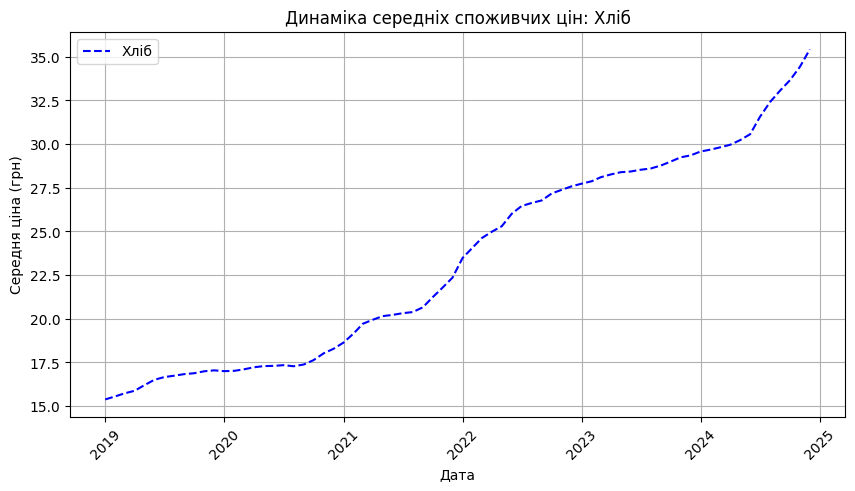


Оцінена середня ціна Хліб по роках:

      Середня ціна (грн)
2019           16.371667
2020           17.410545
2021           20.382644
2022           25.873421
2023           28.524888
2024           31.696522


In [8]:
bread_categories = [
    "Хліб", 
    "Хліб житній, житньо-пшеничний", 
    "Хліб і хлібопродукти", 
    "Хліб пшеничний вищого гатунку", 
    "Хліб пшеничний першого гатунку", 
    "Батон"
]
analyze_avg_price(bread_categories, "Хліб")

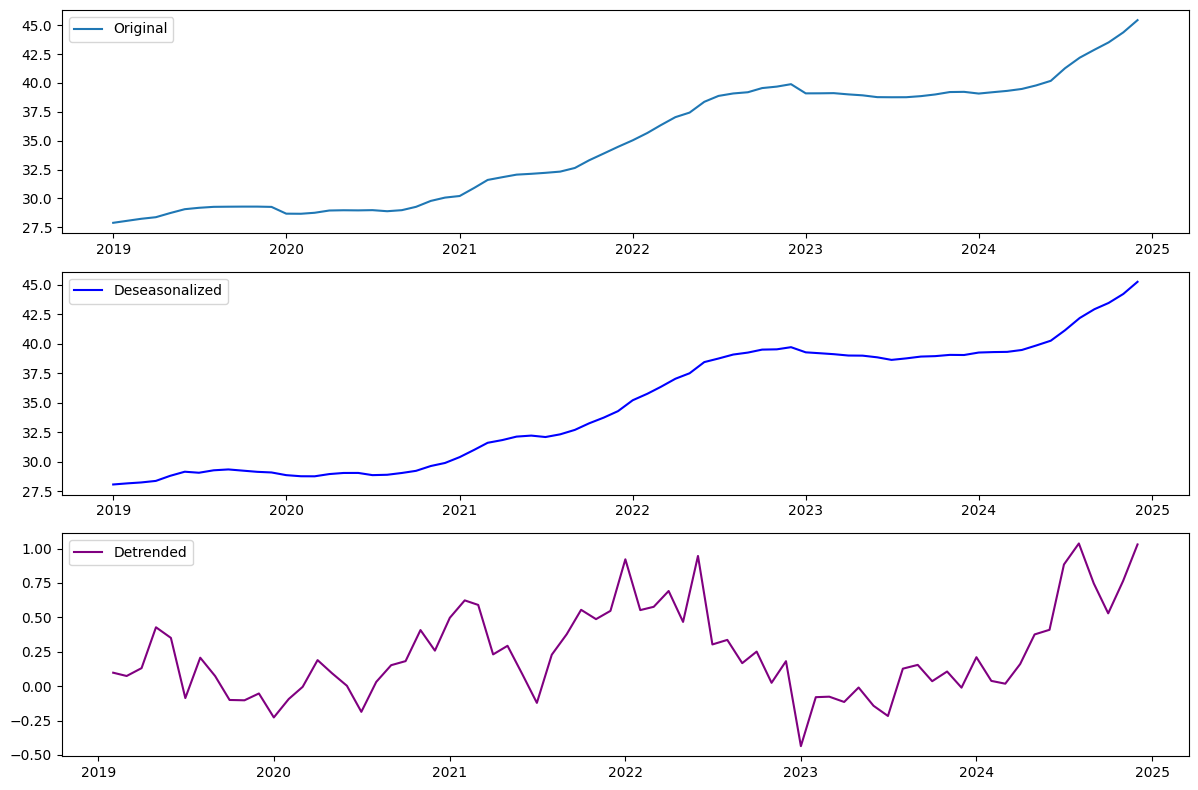

,Original,Deseasonalized,Detrended
2019-02-01,28.079000,28.174920,0.097755
2019-03-01,28.243833,28.248783,0.073863
2019-04-01,28.381667,28.379738,0.130955
2019-05-01,28.737667,28.807667,0.427930
2019-06-01,29.074333,29.158442,0.350774


In [9]:
bread_categories = [
    "Хліб", 
    "Хліб житній, житньо-пшеничний", 
    "Хліб і хлібопродукти", 
    "Хліб пшеничний вищого гатунку", 
    "Хліб пшеничний першого гатунку", 
    "Батон"
]

df_bread = df[df['Тип товарів і послуг'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)


df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

decomposition = sm.tsa.seasonal_decompose(df_prices, model='additive', period=12)

deseasonalized = df_prices - decomposition.seasonal

detrended = deseasonalized.diff()

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Deseasonalized': deseasonalized, 'Detrended': detrended})
df_result.dropna().head()


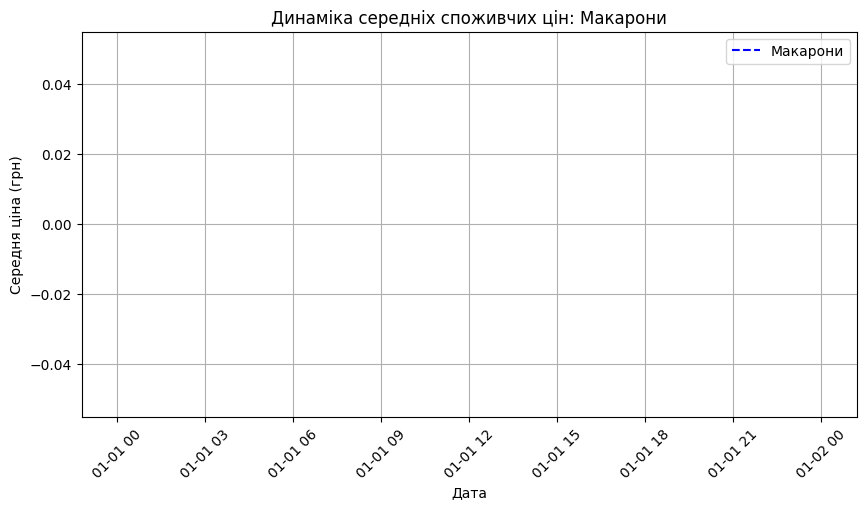


Оцінена середня ціна Mакарони по роках:

      Середня ціна (грн)
2019                 NaN
2020                 NaN
2021                 NaN
2022                 NaN
2023                 NaN
2024                 NaN


In [10]:
pasta_categories = ["Макаронні вироби", "Макаронні вироби з м’яких сортів пшениці"]
analyze_avg_price(pasta_categories, "Mакарони")

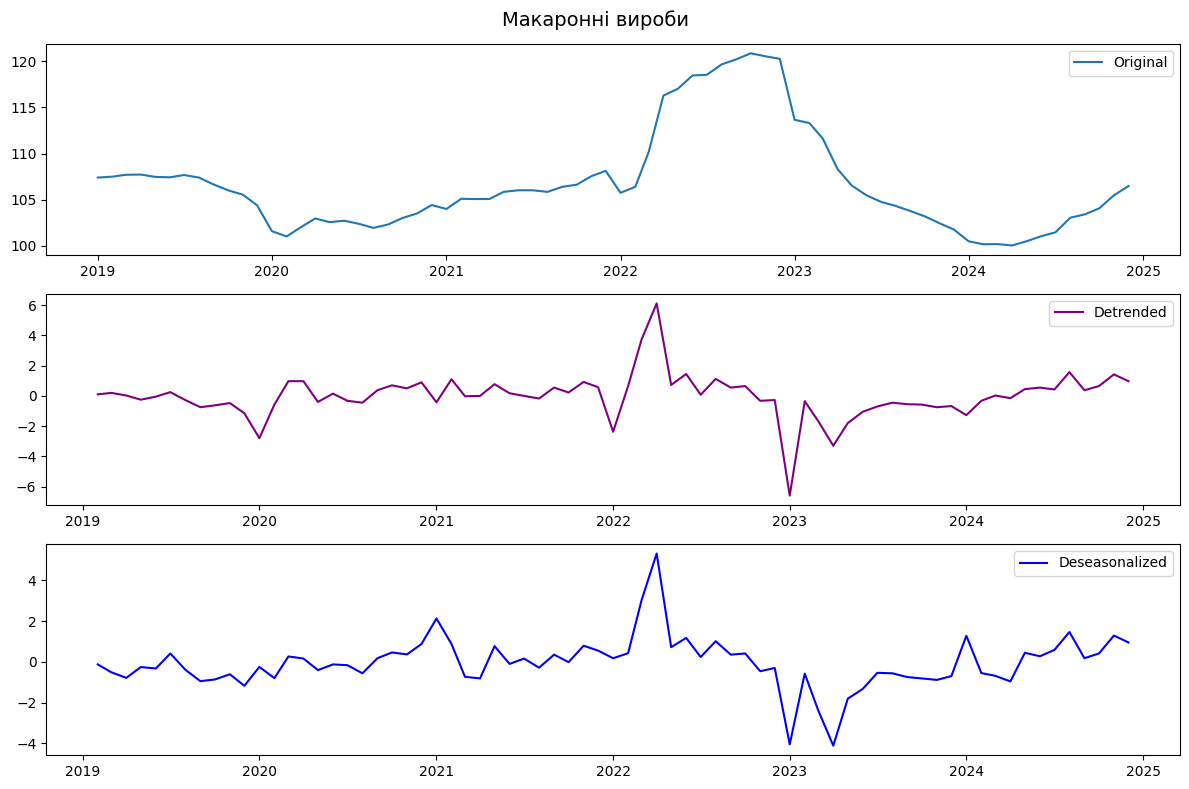

,Original,Detrended,Deseasonalized
2019-02-01,107.500,0.100,-0.124006
2019-03-01,107.700,0.200,-0.509214
2019-04-01,107.725,0.025,-0.784214
2019-05-01,107.475,-0.250,-0.252756
2019-06-01,107.425,-0.050,-0.324214


In [11]:
bread_categories = ["Макаронні вироби", "Макаронні вироби з м’яких сортів пшениці"]

df_bread = df[df['Тип товарів і послуг'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("Макаронні вироби", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

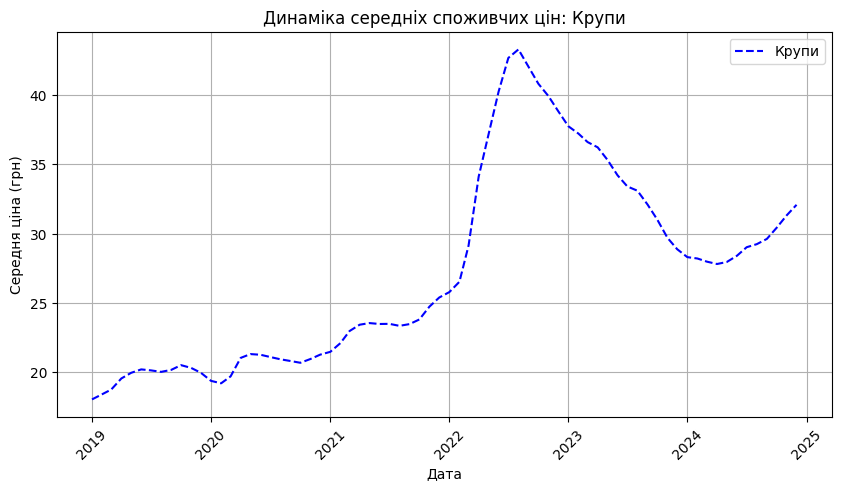


Оцінена середня ціна Крупи по роках:

      Середня ціна (грн)
2019           19.672045
2020           20.638308
2021           23.438859
2022           36.705929
2023           33.790019
2024           29.196404


In [12]:
groats_categories = ["Рис", "Крупи гречані", "Крупи манні", "Крупи ячні", "Пшоно"]
analyze_avg_price(groats_categories, "Крупи")

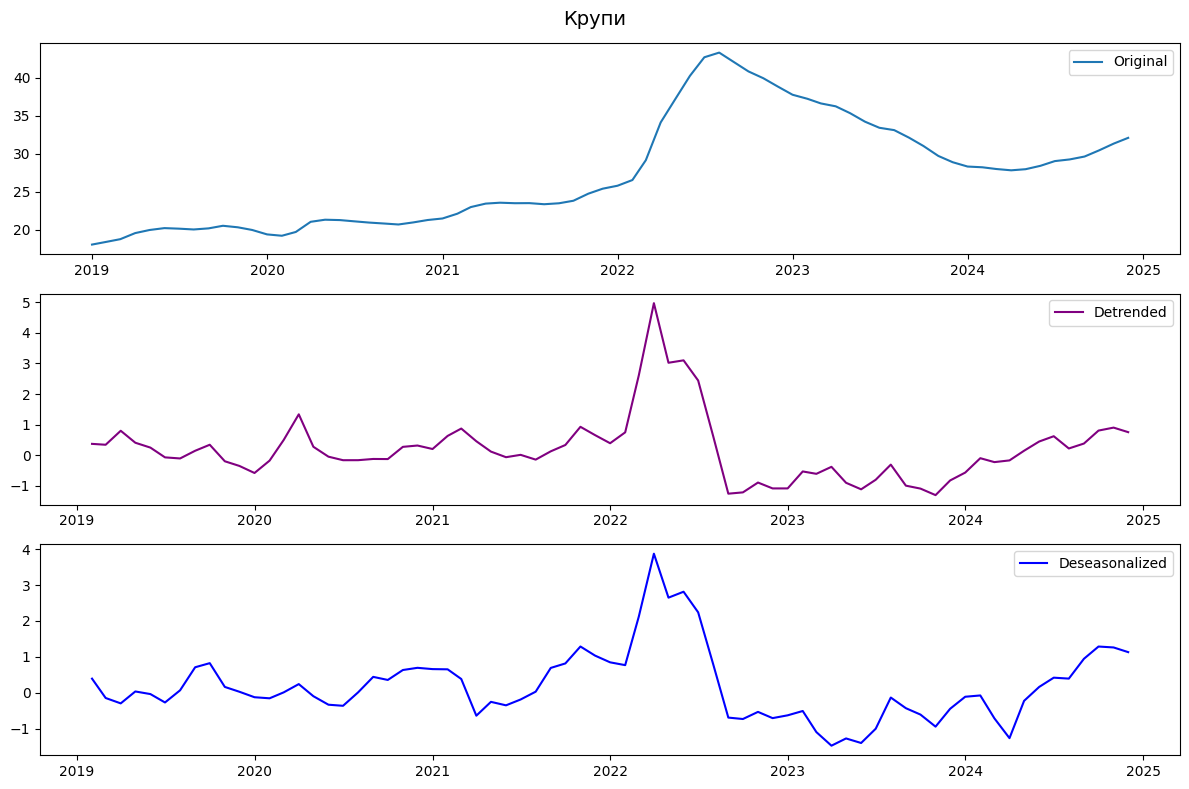

,Original,Detrended,Deseasonalized
2019-02-01,18.413769,0.370000,0.392381
2019-03-01,18.754692,0.340923,-0.146970
2019-04-01,19.553000,0.798308,-0.297146
2019-05-01,19.959923,0.406923,0.035100
2019-06-01,20.207538,0.247615,-0.037720


In [13]:
bread_categories = ["Рис", "Крупи гречані", "Крупи манні", "Крупи ячні", "Пшоно"]

df_bread = df[df['Тип товарів і послуг'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("Крупи", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

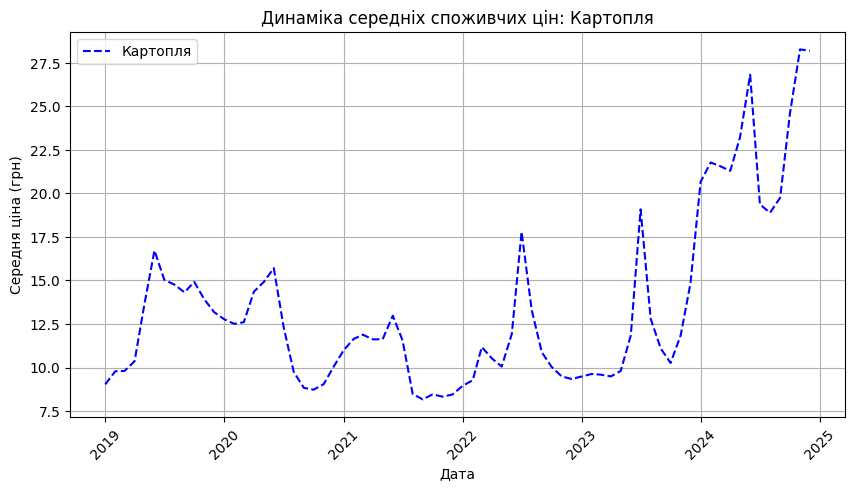


Оцінена середня ціна Картопля по роках:

      Середня ціна (грн)
2019           12.955865
2020           11.798237
2021           10.347468
2022           11.062484
2023           11.647051
2024           22.867692


In [14]:
potato_categories = ["Картопля"]
analyze_avg_price(potato_categories, "Картопля")

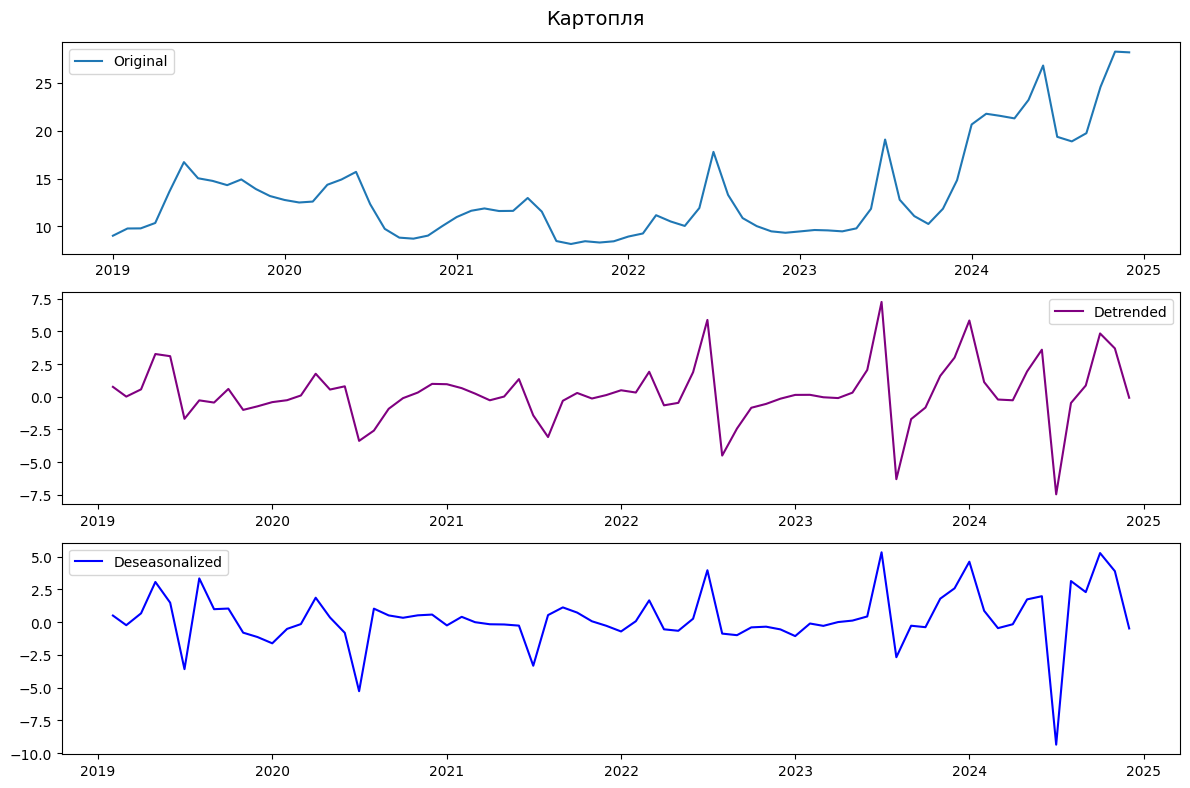

,Original,Detrended,Deseasonalized
2019-02-01,9.789231,0.755385,0.505544
2019-03-01,9.800769,0.011538,-0.231677
2019-04-01,10.365000,0.564231,0.673929
2019-05-01,13.626923,3.261923,3.069586
2019-06-01,16.723846,3.096923,1.486714


In [15]:
bread_categories = ["Картопля"]

df_bread = df[df['Тип товарів і послуг'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")


detrended = df_prices.diff()


decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("Картопля", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

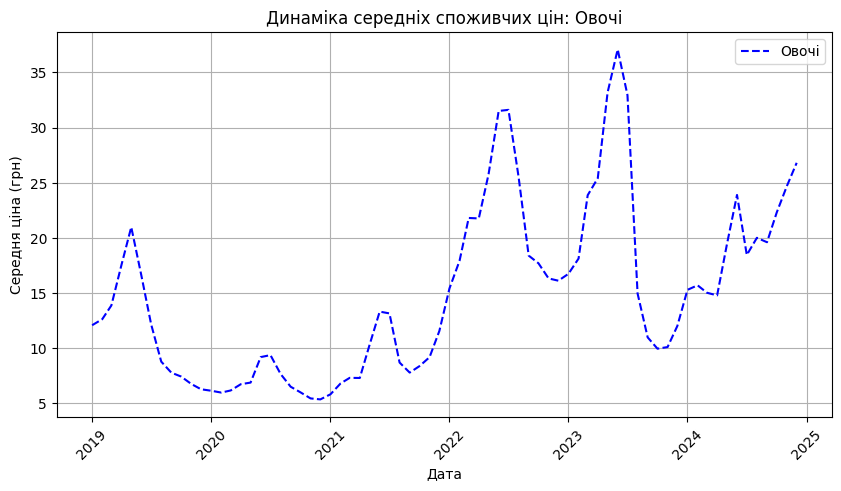


Оцінена середня ціна Овочі по роках:

      Середня ціна (грн)
2019           11.886912
2020            6.761966
2021            9.111432
2022           21.643745
2023           20.434006
2024           19.651667


In [16]:
vegetables_categories = [
    "Буряк", 
    "Капуста білокачанна", 
    "Морква"
]
analyze_avg_price(vegetables_categories, "Овочі")

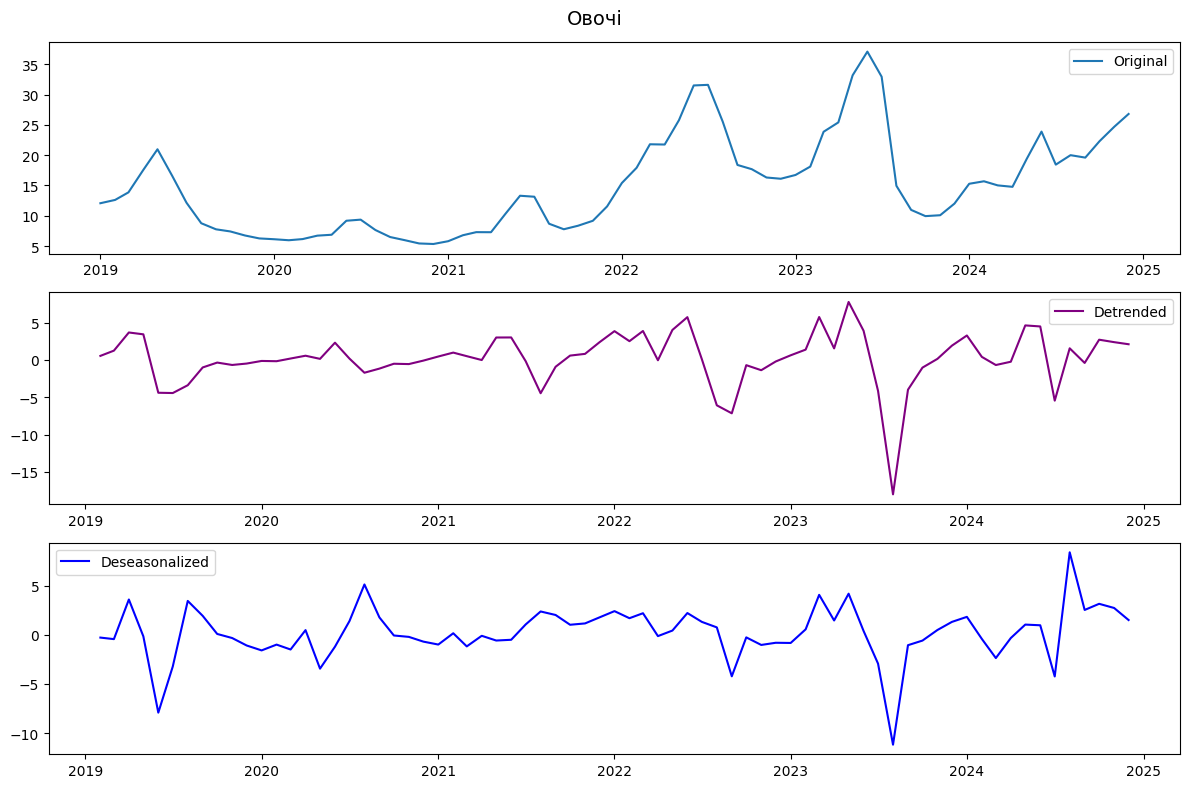

,Original,Detrended,Deseasonalized
2019-02-01,12.607308,0.545641,-0.281132
2019-03-01,13.854487,1.247179,-0.437318
2019-04-01,17.534231,3.679744,3.590664
2019-05-01,20.966795,3.432564,-0.154439
2019-06-01,16.573590,-4.393205,-7.911441


In [17]:
bread_categories = [
    "Буряк", 
    "Капуста білокачанна", 
    "Морква"
]

df_bread = df[df['Тип товарів і послуг'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")


detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("Овочі", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

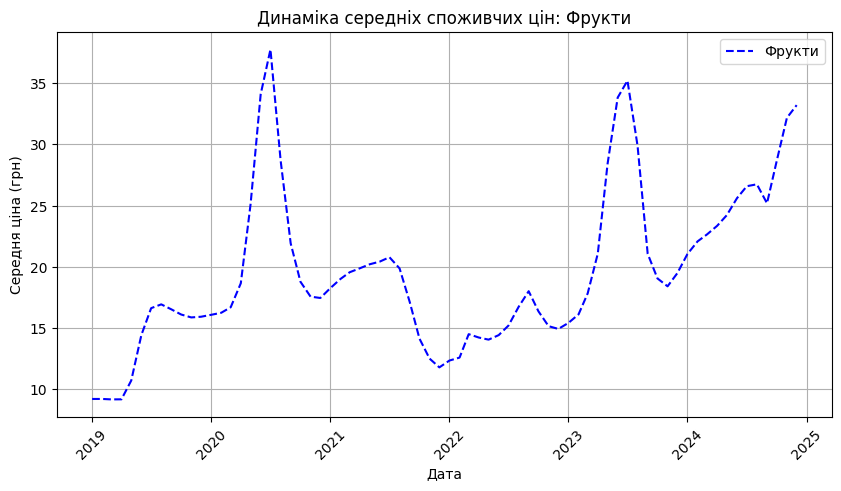


Оцінена середня ціна Фрукти по роках:

      Середня ціна (грн)
2019           13.334840
2020           22.426827
2021           17.804455
2022           14.884968
2023           22.983910
2024           25.959167


In [18]:
fruits_categories = ["Фрукти", "Яблука"]
analyze_avg_price(fruits_categories, "Фрукти")

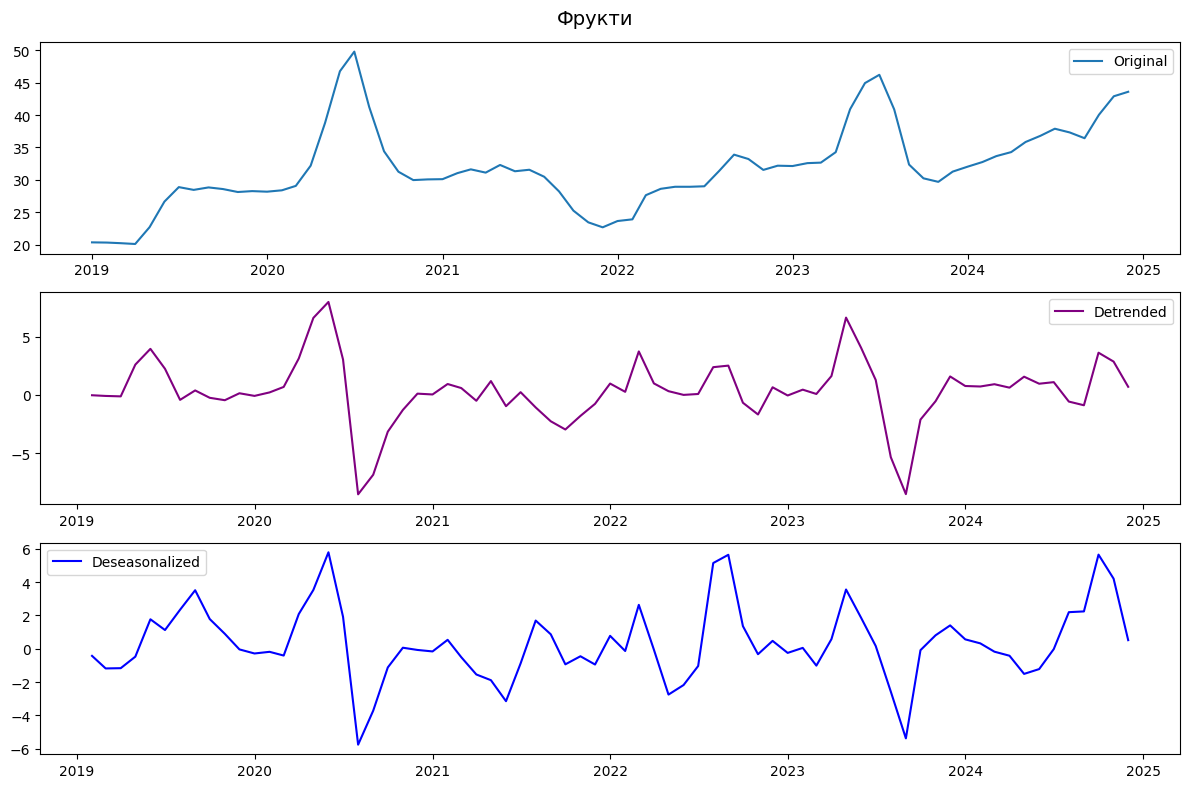

,Original,Detrended,Deseasonalized
2019-02-01,20.326333,-0.032000,-0.430169
2019-03-01,20.235000,-0.091333,-1.183714
2019-04-01,20.107333,-0.127667,-1.168547
2019-05-01,22.700667,2.593333,-0.477344
2019-06-01,26.645333,3.944667,1.765656


In [19]:
bread_categories = ["Фрукти", "Яблука"]

df_bread = df[df['Тип товарів і послуг'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("Фрукти", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

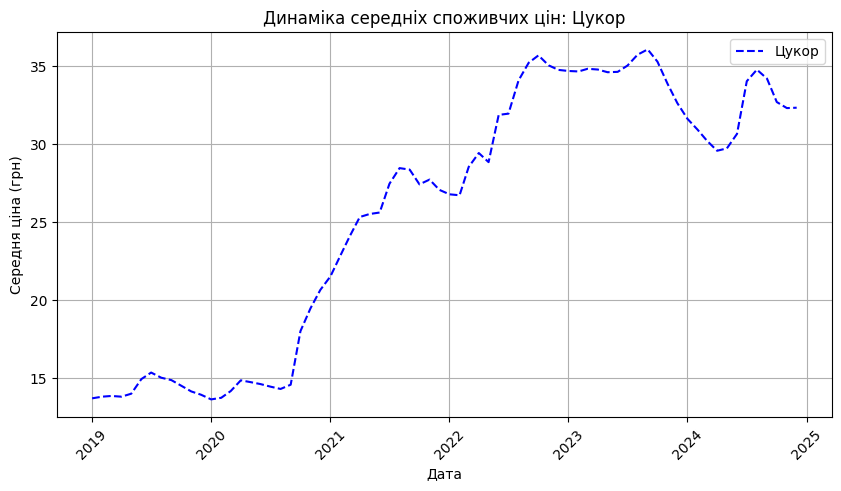


Оцінена середня ціна Цукор по роках:

      Середня ціна (грн)
2019           14.350801
2020           15.623526
2021           25.970962
2022           31.592772
2023           34.747917
2024           31.936635


In [20]:
sugar_categories = ["Цукор"]
analyze_avg_price(sugar_categories, "Цукор")

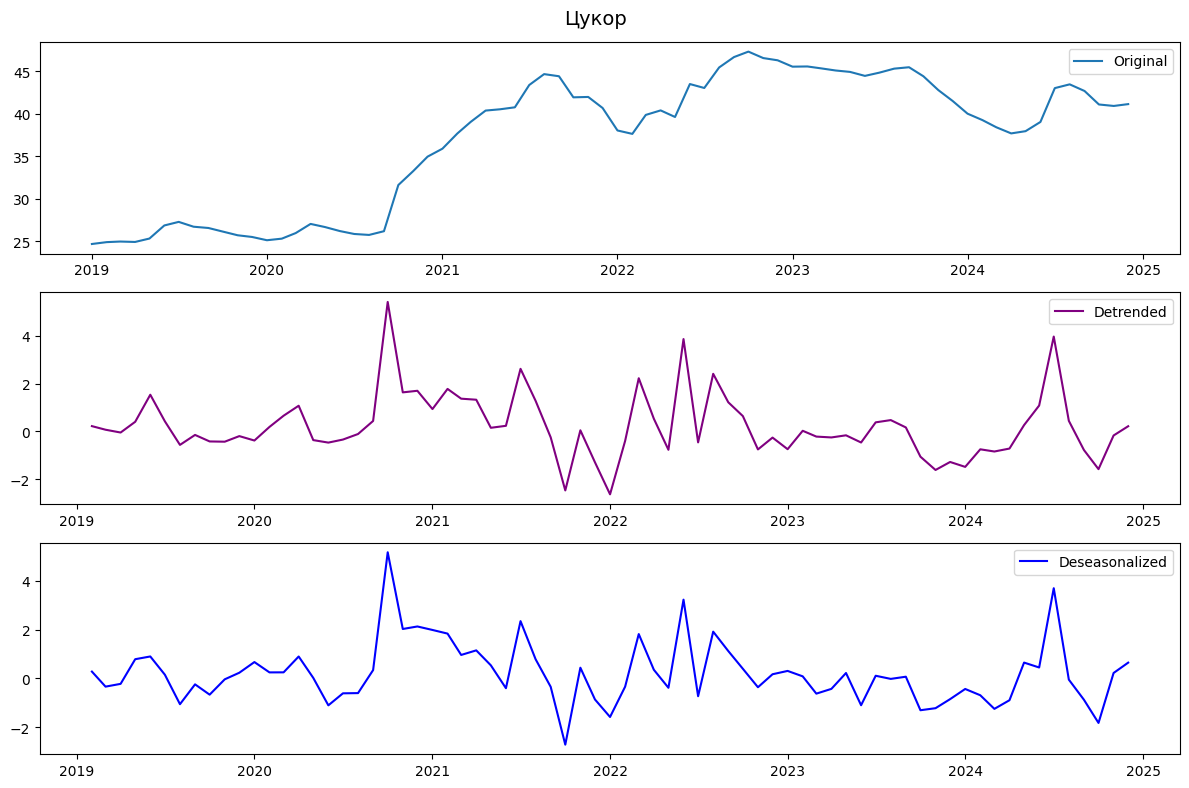

,Original,Detrended,Deseasonalized
2019-02-01,24.920333,0.219333,0.278689
2019-03-01,24.989000,0.068667,-0.338720
2019-04-01,24.940000,-0.049000,-0.224847
2019-05-01,25.341000,0.401000,0.786917
2019-06-01,26.875667,1.534667,0.899225


In [21]:
bread_categories = ["Цукор"]

df_bread = df[df['Тип товарів і послуг'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("Цукор", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

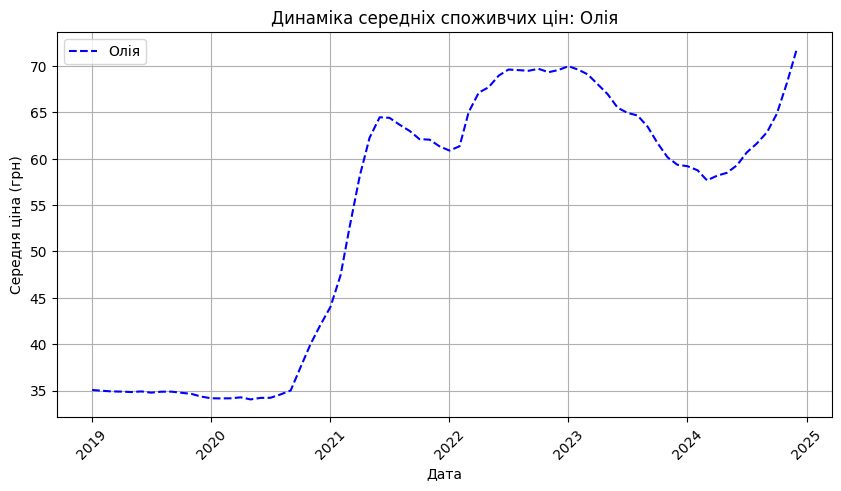


Оцінена середня ціна Олія по роках:

      Середня ціна (грн)
2019           34.820609
2020           35.696474
2021           58.792051
2022           67.347051
2023           65.272308
2024           61.785032


In [22]:
oil_categories = ["Олія соняшникова", "Олія та жири"]
analyze_avg_price(oil_categories, "Олія")

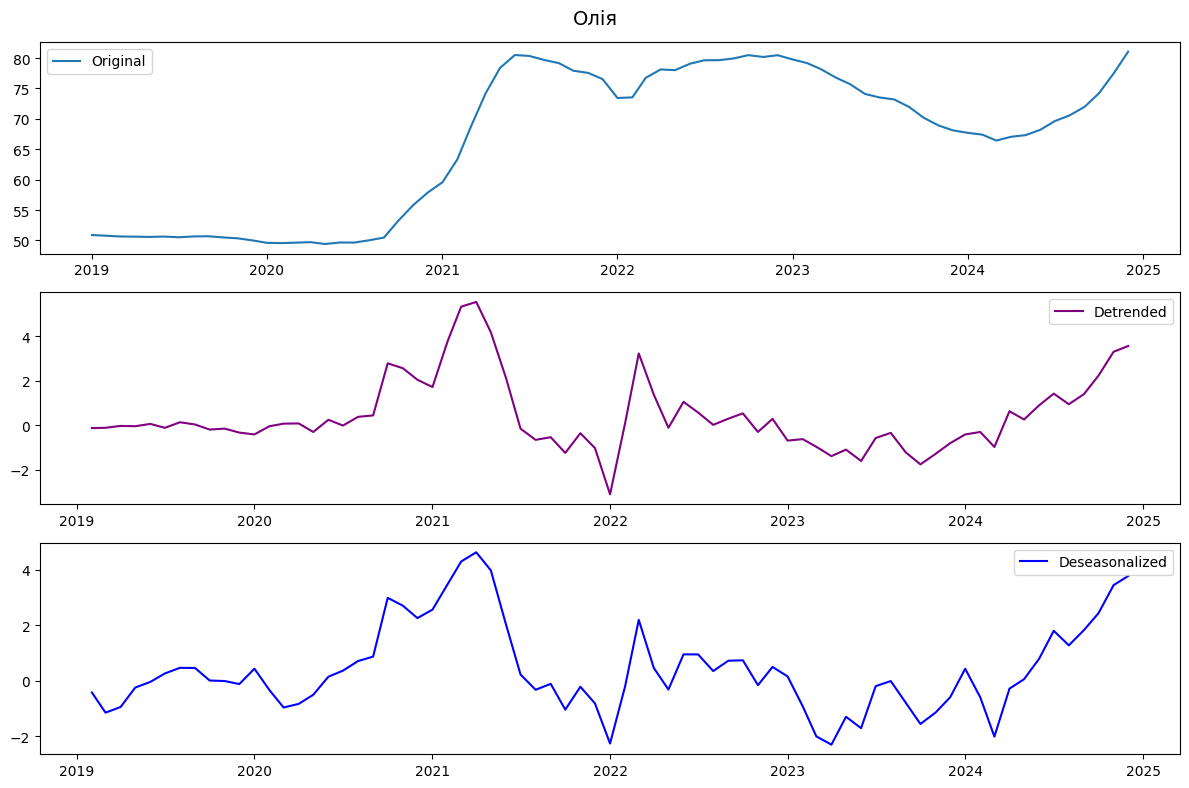

,Original,Detrended,Deseasonalized
2019-02-01,50.763529,-0.127353,-0.421614
2019-03-01,50.649412,-0.114118,-1.146420
2019-04-01,50.619412,-0.030000,-0.942295
2019-05-01,50.576765,-0.042647,-0.243947
2019-06-01,50.635882,0.059118,-0.040550


In [23]:
bread_categories = ["Олія соняшникова", "Олія та жири"]

df_bread = df[df['Тип товарів і послуг'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("Олія", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

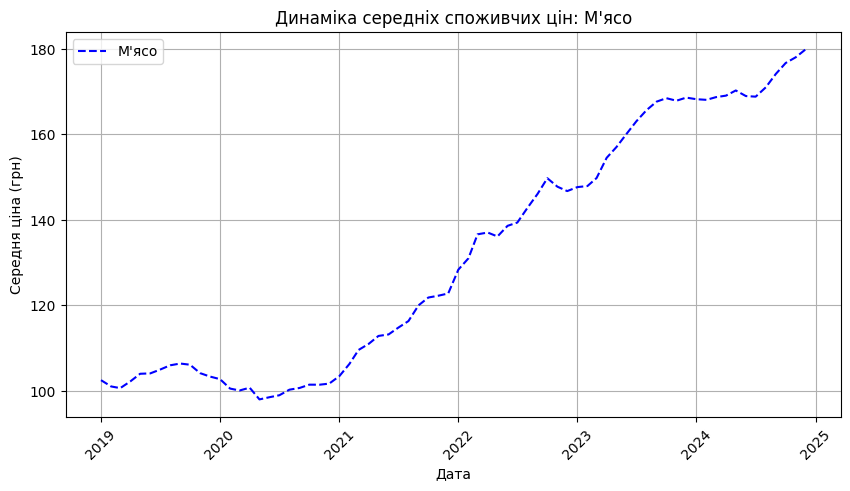


Оцінена середня ціна М'ясо по роках:

      Середня ціна (грн)
2019          103.765457
2020          100.407596
2021          114.511795
2022          140.003466
2023          159.847452
2024          171.812316


In [24]:
meat_categories = ["Птиця (тушки курячі)", "Свинина", "Філе куряче", "Яловичина"]
analyze_avg_price(meat_categories, "М'ясо")

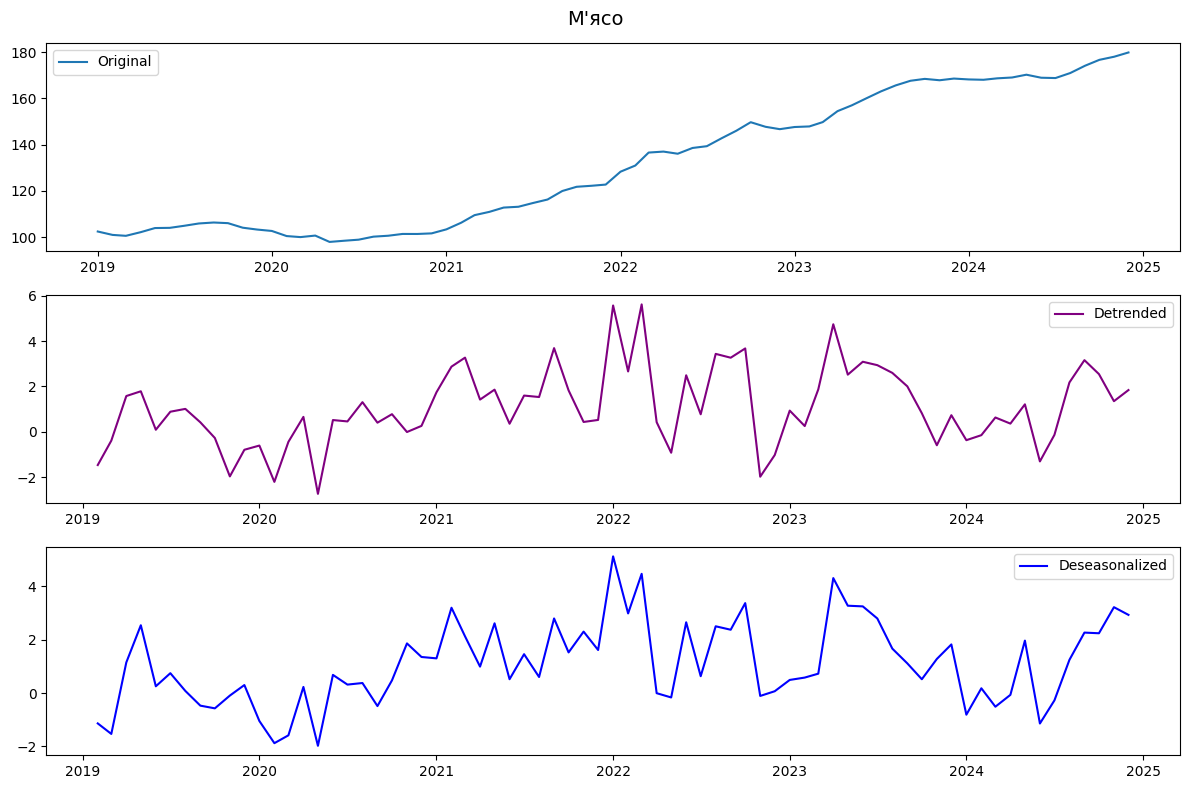

,Original,Detrended,Deseasonalized
2019-02-01,101.013654,-1.468750,-1.136245
2019-03-01,100.620769,-0.392885,-1.530733
2019-04-01,102.194808,1.574038,1.151002
2019-05-01,103.978269,1.783462,2.546115
2019-06-01,104.065769,0.087500,0.256246


In [25]:
bread_categories = ["Птиця (тушки курячі)", "Свинина", "Філе куряче", "Яловичина"]

df_bread = df[df['Тип товарів і послуг'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("М'ясо", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

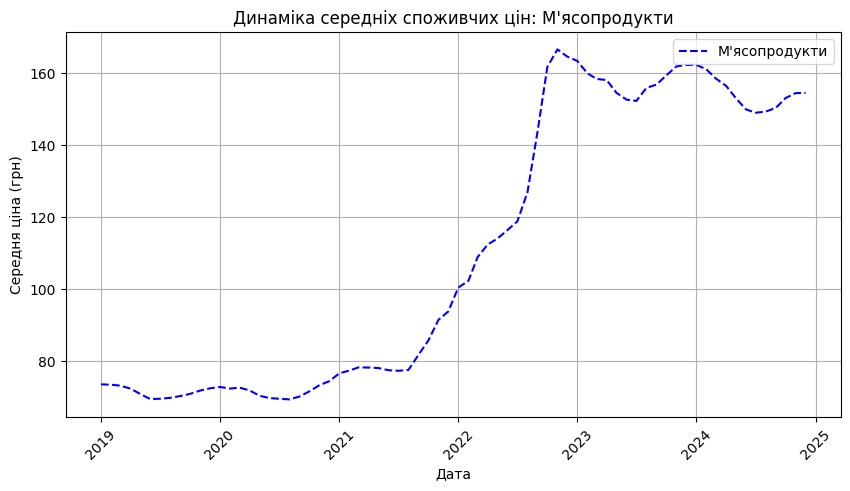


Оцінена середня ціна М'ясопродукти по роках:

      Середня ціна (грн)
2019           71.309519
2020           71.351442
2021           80.986955
2022          127.995417
2023          157.927500
2024          154.307115


In [26]:
meatprodut_categories = ["Ковбаси варені першого ґатунку", "М’ясо та м’ясопродукти", "Сало"]
analyze_avg_price(meatprodut_categories, "М'ясопродукти")

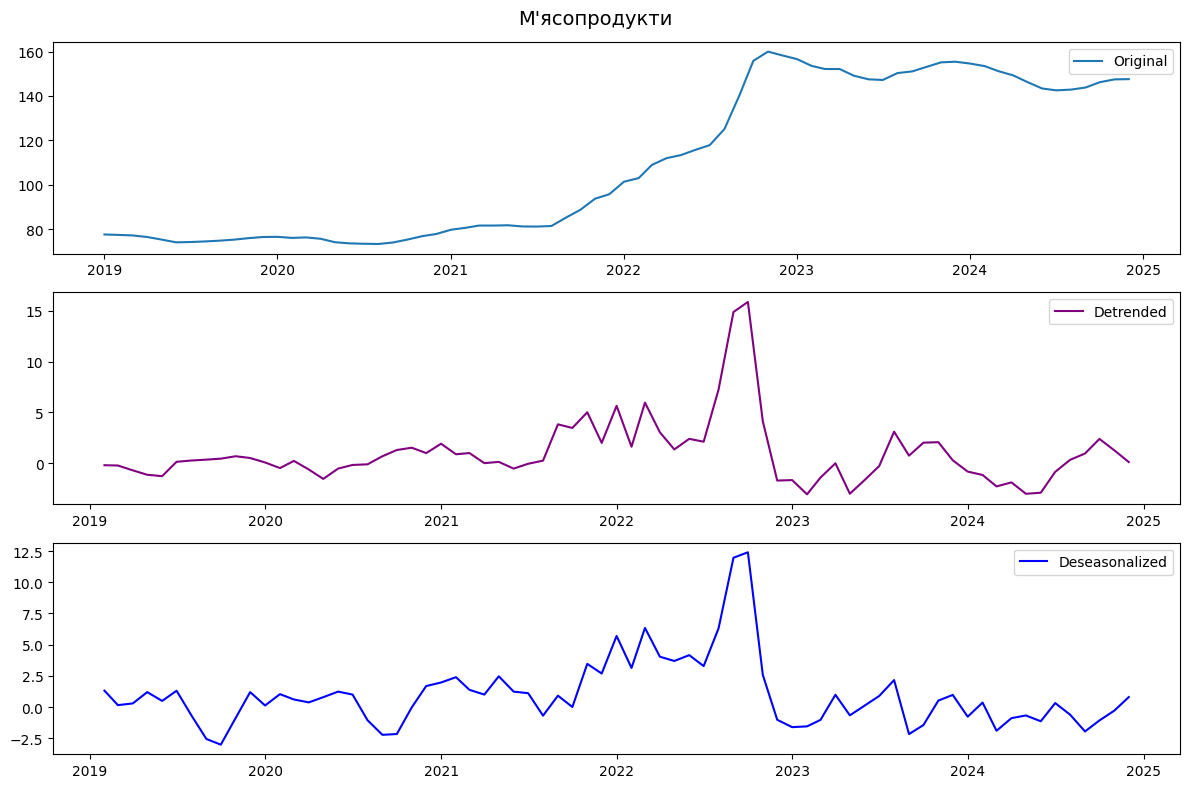

,Original,Detrended,Deseasonalized
2019-02-01,77.331667,-0.197000,1.314157
2019-03-01,77.105333,-0.226333,0.152424
2019-04-01,76.402333,-0.703000,0.289635
2019-05-01,75.264667,-1.137667,1.195724
2019-06-01,73.991333,-1.273333,0.489349


In [27]:
bread_categories = ["Ковбаси варені першого ґатунку", "М’ясо та м’ясопродукти", "Сало"]

df_bread = df[df['Тип товарів і послуг'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("М'ясопродукти", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

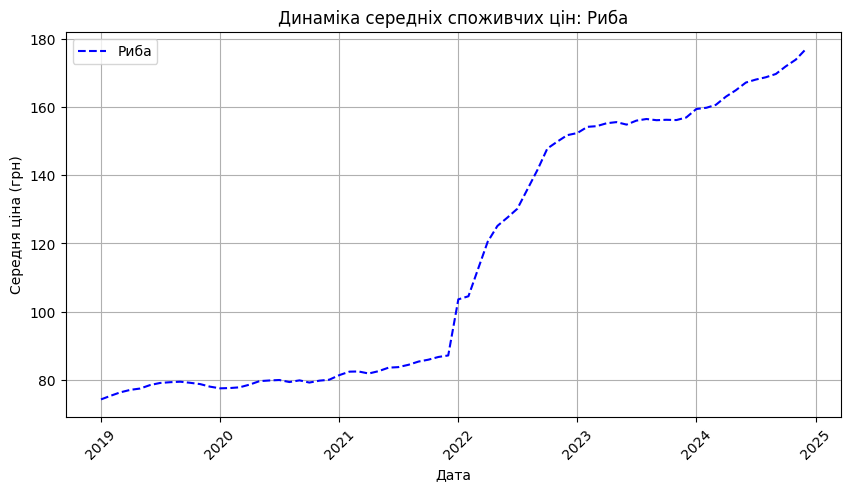


Оцінена середня ціна Риба по роках:

      Середня ціна (грн)
2019           77.749776
2020           79.115160
2021           83.973077
2022          129.187163
2023          155.328173
2024          166.944583


In [28]:
fish_categories = ["Риба морожена", "Риба та продукти з риби"]
analyze_avg_price(fish_categories, "Риба")

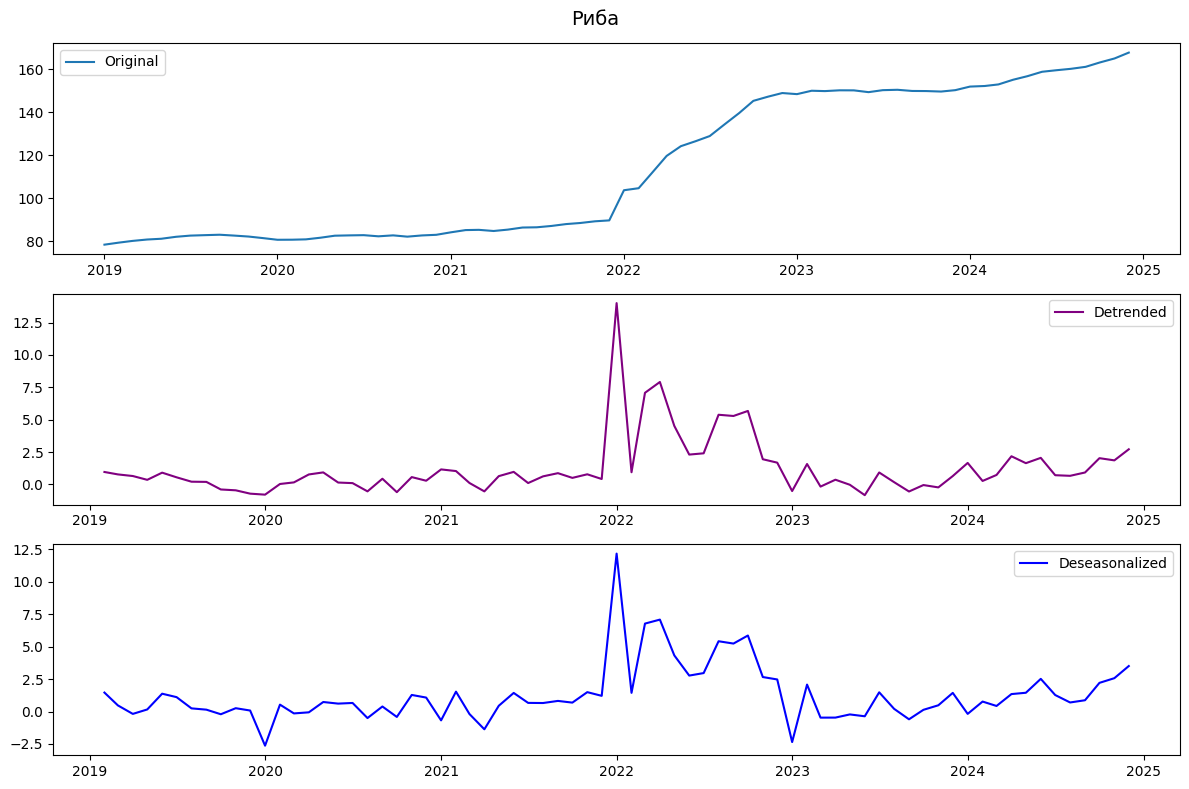

,Original,Detrended,Deseasonalized
2019-02-01,79.449667,0.962000,1.459893
2019-03-01,80.224333,0.774667,0.470729
2019-04-01,80.874333,0.650000,-0.182538
2019-05-01,81.230000,0.355667,0.158948
2019-06-01,82.140000,0.910000,1.372979


In [29]:
bread_categories =  ["Риба морожена", "Риба та продукти з риби"]

df_bread = df[df['Тип товарів і послуг'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("Риба", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

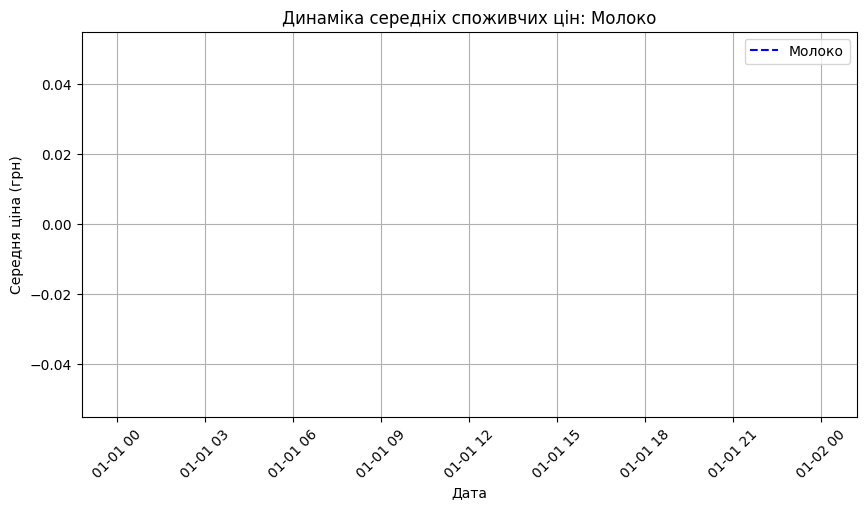


Оцінена середня ціна Молоко по роках:

      Середня ціна (грн)
2019                 NaN
2020                 NaN
2021                 NaN
2022                 NaN
2023                 NaN
2024                 NaN


In [30]:
milk_categories = ["Молоко", "Молоко пастеризоване жирністю до 2,6% включно"]
analyze_avg_price(milk_categories, "Молоко")

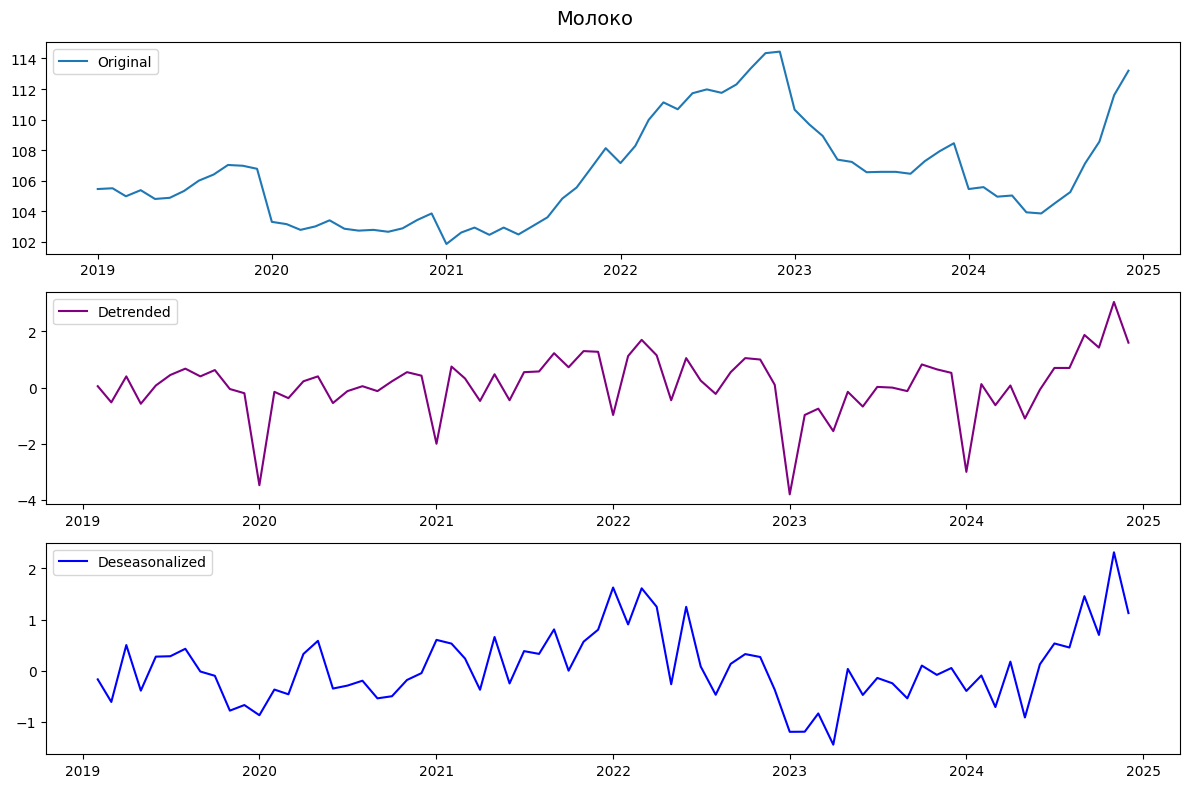

,Original,Detrended,Deseasonalized
2019-02-01,105.500,0.050,-0.171532
2019-03-01,104.975,-0.525,-0.614032
2019-04-01,105.375,0.400,0.499926
2019-05-01,104.800,-0.575,-0.392574
2019-06-01,104.875,0.075,0.273260


In [31]:
bread_categories = ["Молоко", "Молоко пастеризоване жирністю до 2,6% включно"]

df_bread = df[df['Тип товарів і послуг'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("Молоко", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

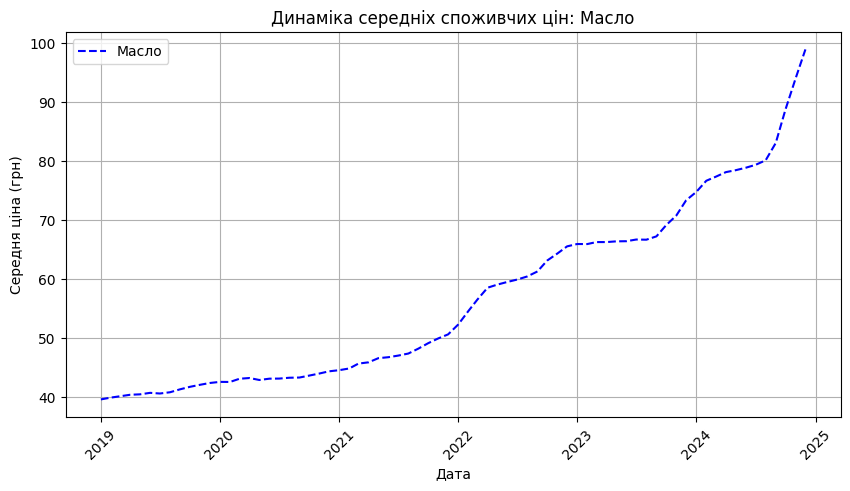


Оцінена середня ціна Масло по роках:

      Середня ціна (грн)
2019           40.836186
2020           43.258013
2021           47.215673
2022           59.603670
2023           67.604167
2024           82.398846


In [32]:
butter_categories = ["Масло", "Масло вершкове"]
analyze_avg_price(butter_categories, "Масло")

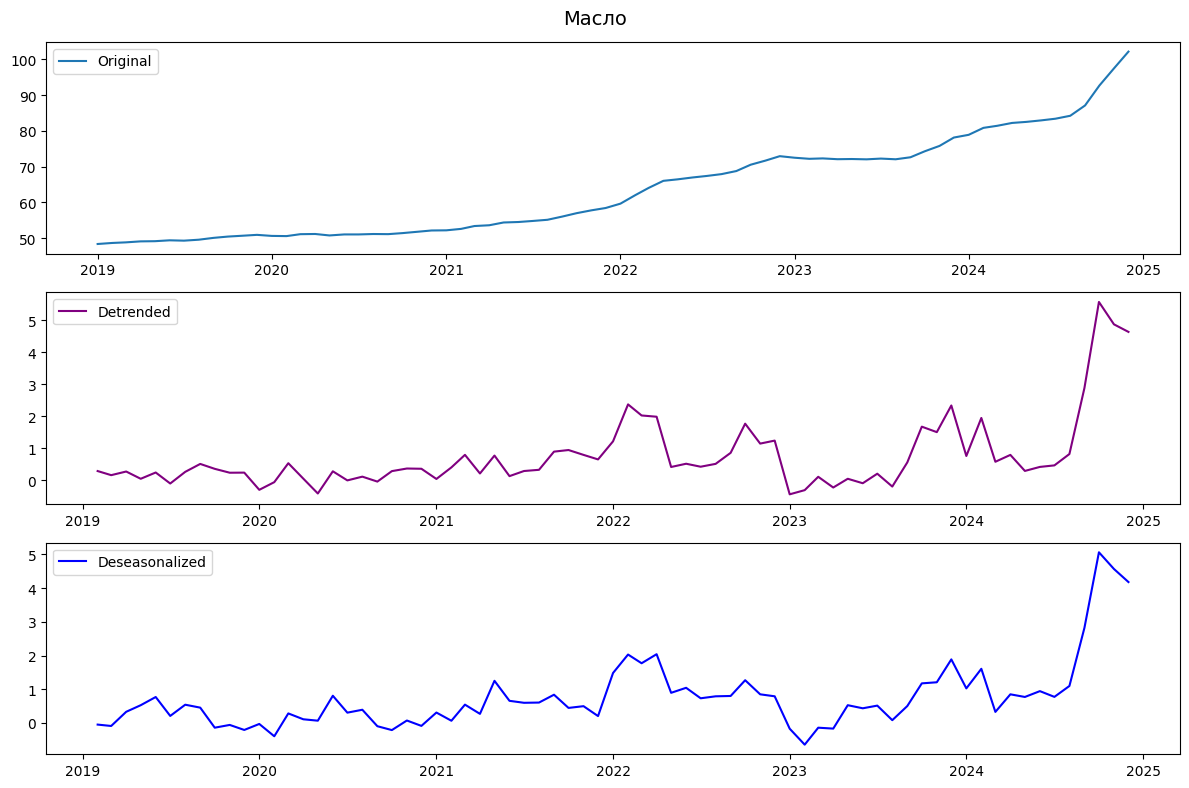

,Original,Detrended,Deseasonalized
2019-02-01,48.679667,0.291667,-0.048043
2019-03-01,48.843333,0.163667,-0.089124
2019-04-01,49.120333,0.277000,0.331476
2019-05-01,49.171000,0.050667,0.526851
2019-06-01,49.417333,0.246333,0.769985


In [33]:
bread_categories = ["Масло", "Масло вершкове"]

df_bread = df[df['Тип товарів і послуг'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("Масло", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

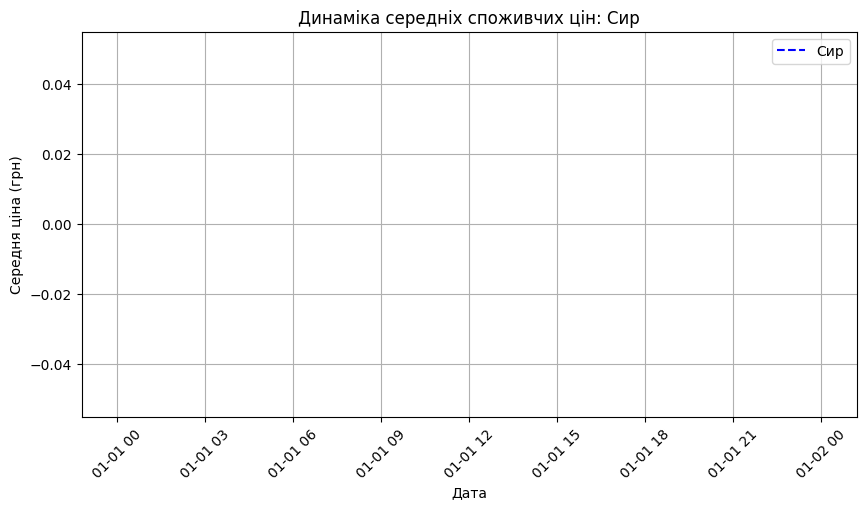


Оцінена середня ціна Сир по роках:

      Середня ціна (грн)
2019                 NaN
2020                 NaN
2021                 NaN
2022                 NaN
2023                 NaN
2024                 NaN


In [34]:
cheese_categories = ["Сири м’які жирні", "Сир і м’який сир (творог)"]
analyze_avg_price(cheese_categories, "Сир")

In [35]:
bread_categories = ["Сири м’які жирні", "Сир і м’який сир (творог)"]

df_bread = df[df['Тип товарів і послуг'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("Сир", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

ValueError: x must have 2 complete cycles requires 24 observations. x only has 0 observation(s)

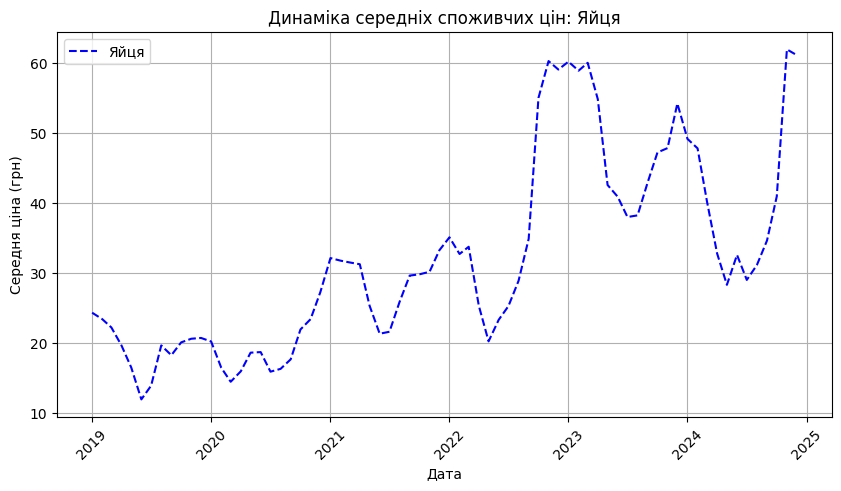


Оцінена середня ціна Яйця по роках:

      Середня ціна (грн)
2019           19.293397
2020           18.928686
2021           28.665545
2022           36.190449
2023           48.871795
2024           40.844968


In [ ]:
egg_categories = ["Яйця"]
analyze_avg_price(egg_categories, "Яйця")

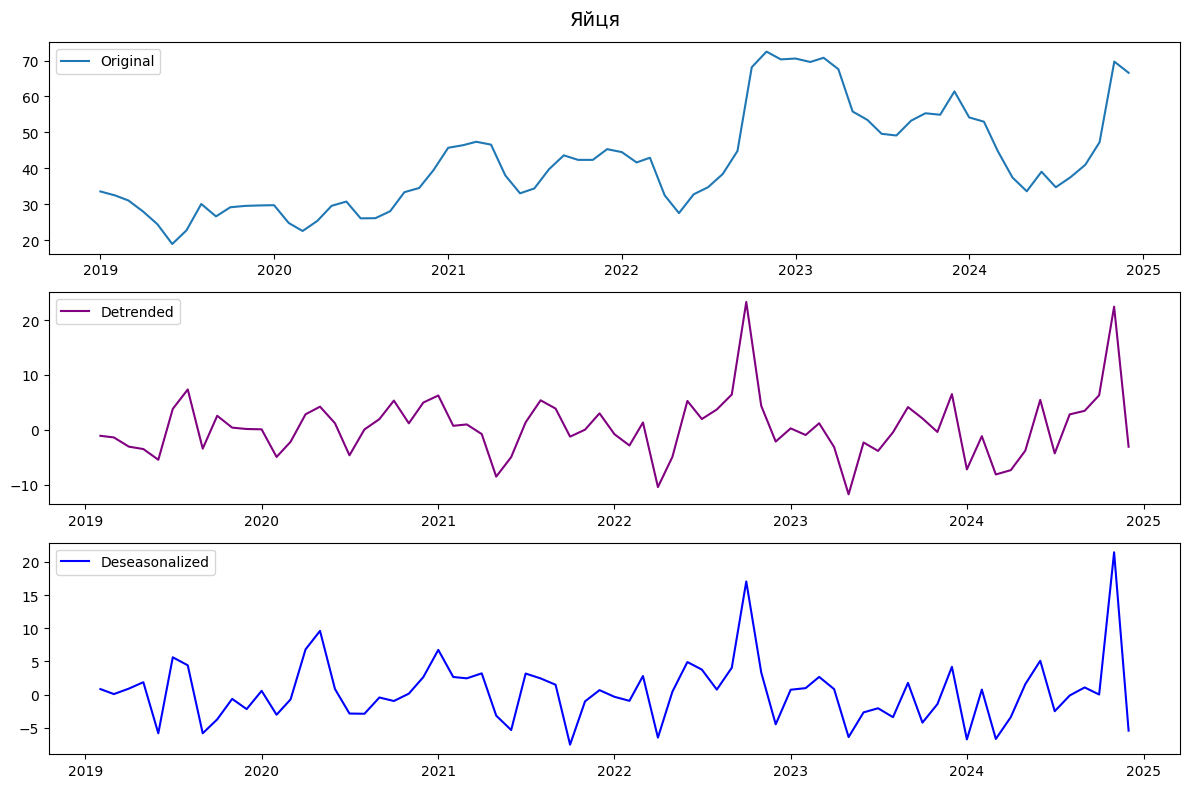

,Original,Detrended,Deseasonalized
2019-02-01,32.455000,-1.111333,0.839690
2019-03-01,31.044333,-1.410667,0.088023
2019-04-01,27.952333,-3.092000,0.911140
2019-05-01,24.423667,-3.528667,1.875554
2019-06-01,18.938667,-5.485000,-5.817741


In [ ]:
bread_categories = ["Яйця"]

df_bread = df[df['Тип товарів і послуг'].isin(bread_categories)]

df_bread.iloc[:, 5:] = df_bread.iloc[:, 5:].astype(float)

df_prices = df_bread.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

detrended = df_prices.diff()

decomposition = sm.tsa.seasonal_decompose(detrended.dropna(), model='additive', period=12)
deseasonalized = detrended - decomposition.seasonal

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.suptitle("Яйця", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Detrended': detrended, 'Deseasonalized': deseasonalized})
df_result.dropna().head()

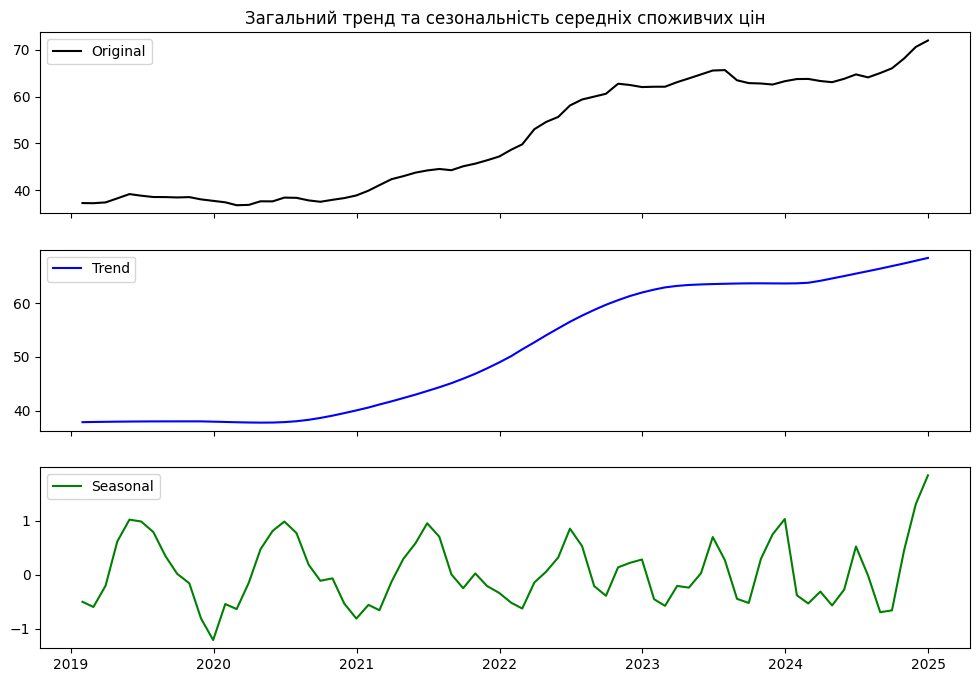

In [ ]:
df_prices = df[df["Показник"] == "Середні споживчі ціни на товари (послуги)"]

date_columns = df.columns[5:]

df_mean = df_prices[date_columns].mean()

df_mean.index = pd.date_range(start='2019-01', periods=len(df_mean), freq='M')

stl = STL(df_mean, period=12, seasonal=13)
res = stl.fit()

fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

axes[0].plot(df_mean, label="Original", color="black")
axes[0].set_title("Загальний тренд та сезональність середніх споживчих цін")
axes[0].legend()

axes[1].plot(res.trend, label="Trend", color="blue")
axes[1].legend()

axes[2].plot(res.seasonal, label="Seasonal", color="green")
axes[2].legend()

plt.show()

- Rising trend → increasing prices over time.
- Regular peaks/drops indicate seasonal price fluctuations (e.g., higher prices before holidays).

In [ ]:
print(df.head())

               Показник     Тип товарів і послуг  \
0  Індекс споживчих цін     Хліб і хлібопродукти   
1  Індекс споживчих цін                     Хліб   
2  Індекс споживчих цін         Макаронні вироби   
3  Індекс споживчих цін   М’ясо та м’ясопродукти   
4  Індекс споживчих цін  Риба та продукти з риби   

                            Базисний період Територіальний розріз  \
0  До відповідного місяця попереднього року               Україна   
1  До відповідного місяця попереднього року               Україна   
2  До відповідного місяця попереднього року               Україна   
3  До відповідного місяця попереднього року               Україна   
4  До відповідного місяця попереднього року               Україна   

  Періодичність  2019-M01  2019-M02  2019-M03  2019-M04  2019-M05  ...  \
0       Місячна     114.1     114.1     114.3     114.5     115.1  ...   
1       Місячна     120.9     120.4     120.0     119.3     120.2  ...   
2       Місячна     114.2     113.8     113.7     

In [ ]:
df.columns

Index(['Показник', 'Тип товарів і послуг', 'Базисний період',
       'Територіальний розріз', 'Періодичність', '2019-M01', '2019-M02',
       '2019-M03', '2019-M04', '2019-M05', '2019-M06', '2019-M07', '2019-M08',
       '2019-M09', '2019-M10', '2019-M11', '2019-M12', '2020-M01', '2020-M02',
       '2020-M03', '2020-M04', '2020-M05', '2020-M06', '2020-M07', '2020-M08',
       '2020-M09', '2020-M10', '2020-M11', '2020-M12', '2021-M01', '2021-M02',
       '2021-M03', '2021-M04', '2021-M05', '2021-M06', '2021-M07', '2021-M08',
       '2021-M09', '2021-M10', '2021-M11', '2021-M12', '2022-M01', '2022-M02',
       '2022-M03', '2022-M04', '2022-M05', '2022-M06', '2022-M07', '2022-M08',
       '2022-M09', '2022-M10', '2022-M11', '2022-M12', '2023-M01', '2023-M02',
       '2023-M03', '2023-M04', '2023-M05', '2023-M06', '2023-M07', '2023-M08',
       '2023-M09', '2023-M10', '2023-M11', '2023-M12', '2024-M01', '2024-M02',
       '2024-M03', '2024-M04', '2024-M05', '2024-M06', '2024-M07', '2024-M0

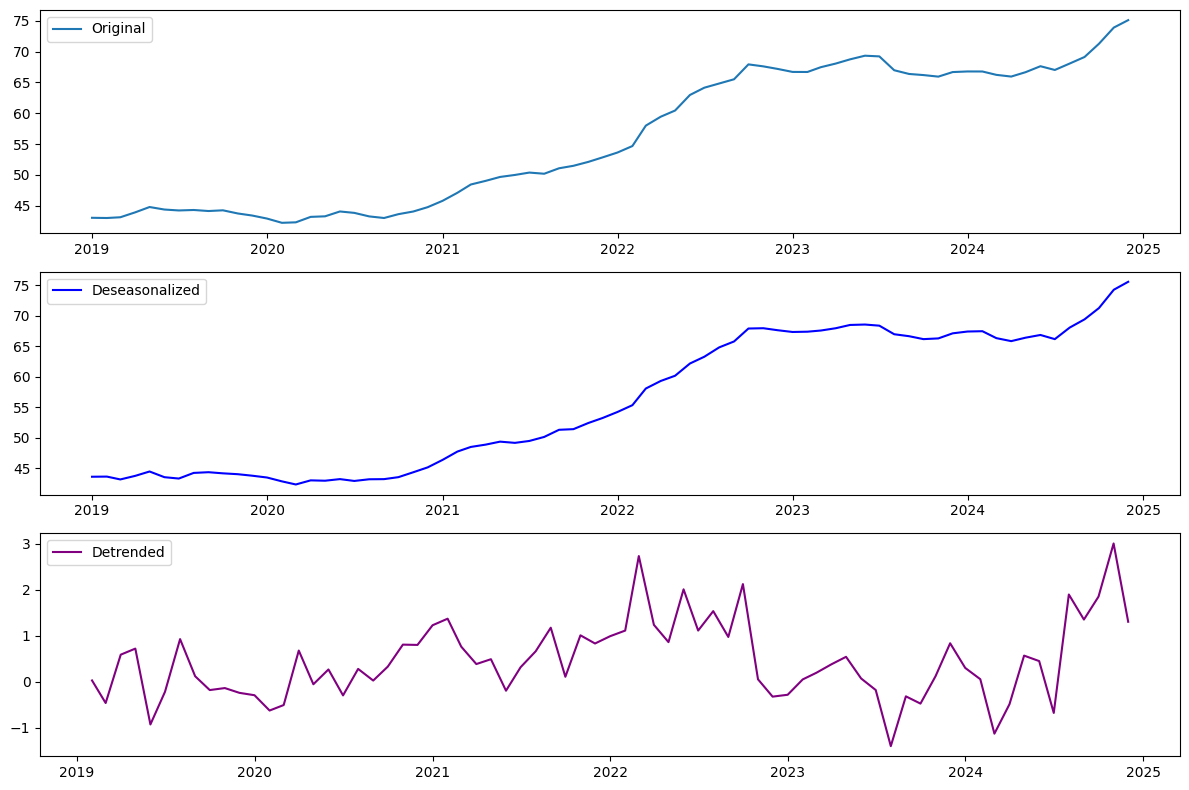

,Original,Deseasonalized,Detrended
2019-02-01,42.981560,43.635774,0.024130
2019-03-01,43.102951,43.169190,-0.466584
2019-04-01,43.900826,43.753808,0.584618
2019-05-01,44.765612,44.470035,0.716227
2019-06-01,44.357416,43.537656,-0.932379


In [ ]:
df.iloc[:, 5:] = df.iloc[:, 5:].astype(float)

df_prices = df.iloc[:, 5:].mean(axis=0)

df_prices.index = df_prices.index.str.replace(r"(\d{4})-M(\d{2})", r"\1-\2", regex=True)
df_prices.index = pd.to_datetime(df_prices.index, format="%Y-%m")

decomposition = sm.tsa.seasonal_decompose(df_prices, model='additive', period=12)

deseasonalized = df_prices - decomposition.seasonal

detrended = deseasonalized.diff()

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_prices, label="Original")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()
plt.tight_layout()
plt.show()

df_result = pd.DataFrame({'Original': df_prices, 'Deseasonalized': deseasonalized, 'Detrended': detrended})
df_result.dropna().head()



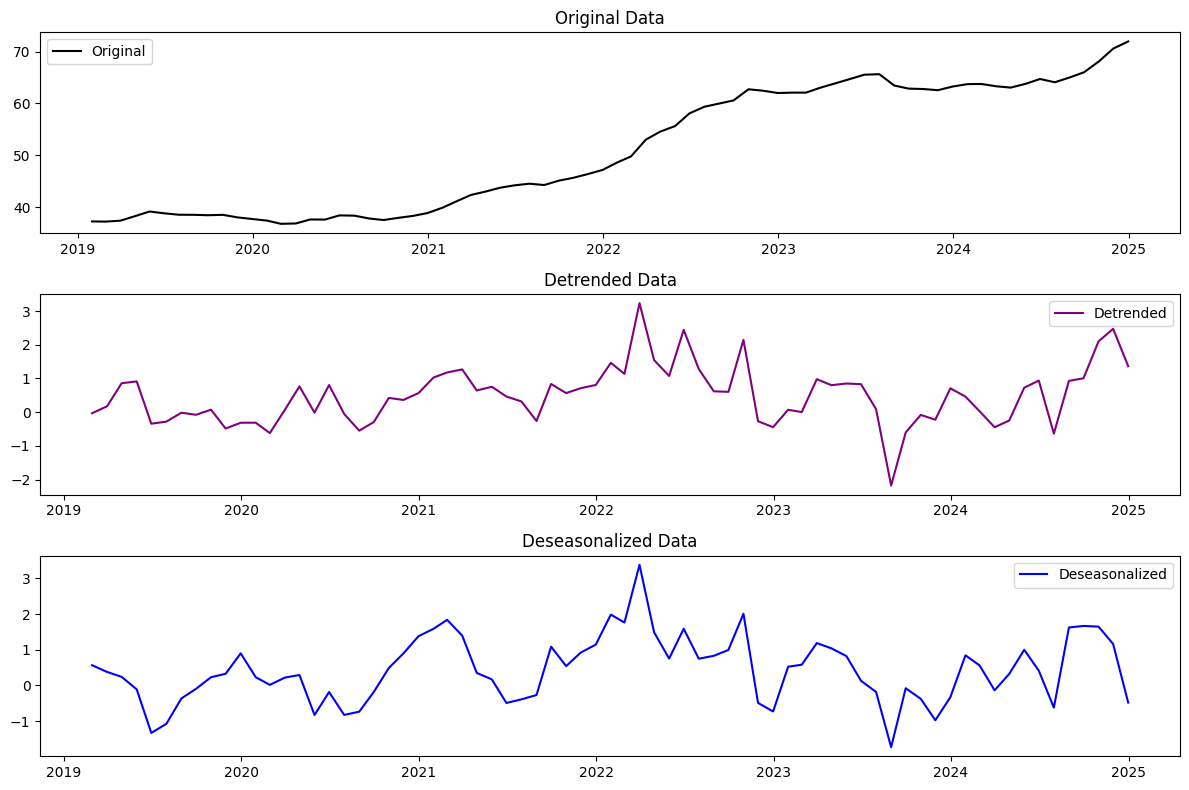

In [ ]:

# df_prices = df[df["Показник"] == "Середні споживчі ціни"]

# # Виділення часових колонок
# date_columns = df.columns[5:]  # Припускаємо, що перші 5 колонок — не числові дані

# # Середня споживча ціна для всіх продуктів
# df_mean = df_prices[date_columns].mean()

# # Перетворюємо індекси у формат дати
# df_mean.index = pd.date_range(start='2019-01', periods=len(df_mean), freq='M')


# stl = STL(df_mean, period=12, seasonal=13)
# res = stl.fit()

detrended = df_mean.diff().dropna()

deseasonalized = detrended - res.seasonal[1:]

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_mean, label="Original", color="black")
plt.legend()
plt.title("Original Data")

plt.subplot(3, 1, 2)
plt.plot(detrended, label="Detrended", color='purple')
plt.legend()
plt.title("Detrended Data")

plt.subplot(3, 1, 3)
plt.plot(deseasonalized, label="Deseasonalized", color='blue')
plt.legend()
plt.title("Deseasonalized Data")

plt.tight_layout()
plt.show()

In [ ]:
regions = df["Територіальний розріз"].unique()
regions


array(['Україна', 'Вінницька', 'Волинська', 'Дніпропетровська',
       'Донецька', 'Житомирська', 'Закарпатська', 'Запорізька',
       'Івано-Франківська', 'Київська', 'Кіровоградська', 'Луганська',
       'Львівська', 'Миколаївська', 'Одеська', 'Полтавська', 'Рівненська',
       'Сумська', 'Тернопільська', 'Харківська', 'Херсонська',
       'Хмельницька', 'Черкаська', 'Чернівецька', 'Чернігівська', 'Київ'],
      dtype=object)

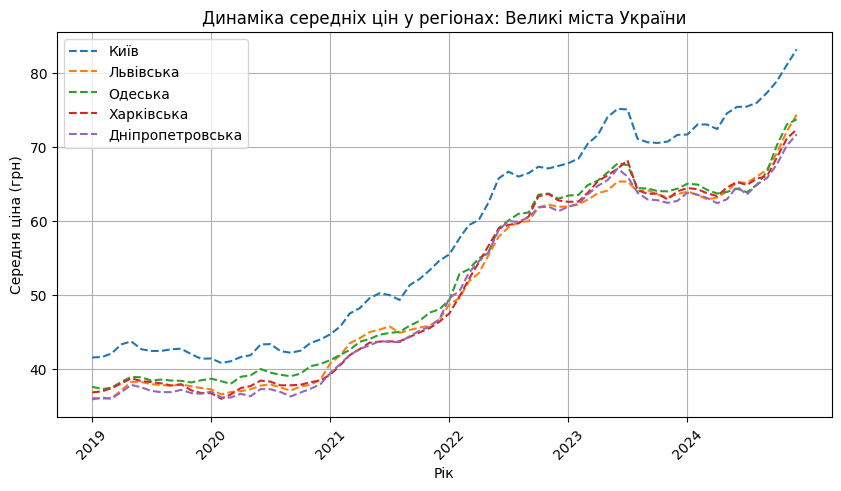


Оцінена середня ціна по роках для: Великі міста України

Територіальний розріз       Київ  Львівська    Одеська  Харківська  Дніпропетровська
2019                   42.433696  37.408406  38.297428   37.743333         36.860543
2020                   42.379819  37.498225  39.325688   37.656812         36.891848
2021                   49.760399  44.593587  44.708043   43.396449         43.463913
2022                   63.499653  56.787257  58.168750   57.426632         57.314826
2023                   71.411563  63.677708  65.024861   64.519201         63.820243
2024                   75.975903  66.376667  66.539306   66.185903         65.354375


In [ ]:
# Group by region and compute mean prices
def analyze_avg_price_by_region(regions, title):
    filtered_df = df[df["Показник"] == "Середні споживчі ціни на товари (послуги)"]

    region_prices = filtered_df.groupby("Територіальний розріз").mean(numeric_only=True)

    region_prices.columns = pd.to_datetime(region_prices.columns, format="%Y-M%m")

    plt.figure(figsize=(10, 5))
    for region in regions:
        if region in region_prices.index:
            plt.plot(region_prices.columns, region_prices.loc[region], linestyle="dashed", label=region)
        else:
            print(f"⚠️ Попередження: Дані для регіону '{region}' відсутні!")

    plt.xticks(region_prices.columns[::12], labels=region_prices.columns[::12].year, rotation=45)

    plt.title(f"Динаміка середніх цін у регіонах: {title}")
    plt.xlabel("Рік")
    plt.ylabel("Середня ціна (грн)")
    plt.legend()
    plt.grid(True)
    plt.show()

    yearly_avg = region_prices.T.resample("Y").mean()
    yearly_avg.index = yearly_avg.index.year

    print(f"\nОцінена середня ціна по роках для: {title}\n")
    print(yearly_avg[regions].to_string(index=True, header=True))

analyze_avg_price_by_region(["Київ", "Львівська", "Одеська", "Харківська", "Дніпропетровська"], "Великі міста України")



## Hypotheses under 3.4.1

We can stack all the time series into one dataset:

- Each row = (category, month, CPI)
- Add a group dummy: is_bread = 1 for bread categories, 0 otherwise

Then estimate:
$\mathrm{CPI}_{i t}=\beta_0+\beta_1 \cdot \operatorname{COVID}_t+\beta_2 \cdot \mathrm{War}_t+\beta_3 \cdot \operatorname{Bread}_i+\beta_4 \cdot\left(\operatorname{Bread}_i \times \mathrm{War}_t\right)+\epsilon_{i t}$

This allows us to test whether:

- Bread prices are different from others in general (β₃)
- Bread prices responded differently to war (β₄ — the interaction term)


In [44]:
df_grouped = pd.read_csv("grouped_bread.csv")
df_grouped = df_grouped.drop(columns=["Unnamed: 0", "2019", "2020", "2021", "2022", "2023", "2024"])
time_columns = [col for col in df_grouped.columns if "-M" in col]

df_long = df_grouped.melt(
    id_vars=["Територіальний розріз", "Тип товарів і послуг"],
    value_vars=time_columns,
    var_name="Date",
    value_name="CPI"
)

df_long["Date"] = df_long["Date"].str.replace(r"-M", "-", regex=True)
df_long["Date"] = pd.to_datetime(df_long["Date"], format="%Y-%m")
df_long["is_bread"] = df_long["Тип товарів і послуг"].str.lower().str.contains("хліб").astype(int)
df_long["covid"] = (df_long["Date"] >= pd.to_datetime("2020-03-01")).astype(int)
df_long["war"] = (df_long["Date"] >= pd.to_datetime("2022-02-01")).astype(int)
df_long["bread_war_interact"] = df_long["is_bread"] * df_long["war"]
df_long.head()


,Територіальний розріз,Тип товарів і послуг,Date,CPI,is_bread,covid,war,bread_war_interact
0,Івано-Франківська,Картопля,2019-01-01,7.67,0,0,0,0
1,Івано-Франківська,Ковбасні вироби,2019-01-01,73.94,0,0,0,0
2,Івано-Франківська,Крупи,2019-01-01,18.87,0,0,0,0
3,Івано-Франківська,Мʼясо свійських тварин та птиці,2019-01-01,101.58,0,0,0,0
4,Івано-Франківська,Макарони,2019-01-01,17.80,0,0,0,0


In [45]:
X = sm.add_constant(df_long[["covid", "war", "is_bread", "bread_war_interact"]])
y = df_long["CPI"]
model = sm.OLS(y, X).fit()
summary_table = model.summary2().tables[1]
print(summary_table)

                        Coef.  Std.Err.          t         P>|t|     [0.025  \
const               41.757722  0.639534  65.293977  0.000000e+00  40.504205   
covid                5.005228  0.800405   6.253370  4.073911e-10   3.436396   
war                 25.847570  0.647383  39.926272  0.000000e+00  24.578669   
is_bread           -24.156512  1.556192 -15.522837  4.052908e-54 -27.206721   
bread_war_interact -15.187052  2.216018  -6.853307  7.363243e-12 -19.530553   

                       0.975]  
const               43.011239  
covid                6.574059  
war                 27.116470  
is_bread           -21.106302  
bread_war_interact -10.843552  


#### Results:
- Significant CPI increase after March 2020
- Strong CPI surge after Feb 2022 for all items
- Bread is significantly cheaper on average
- Bread prices rose less than others during the war

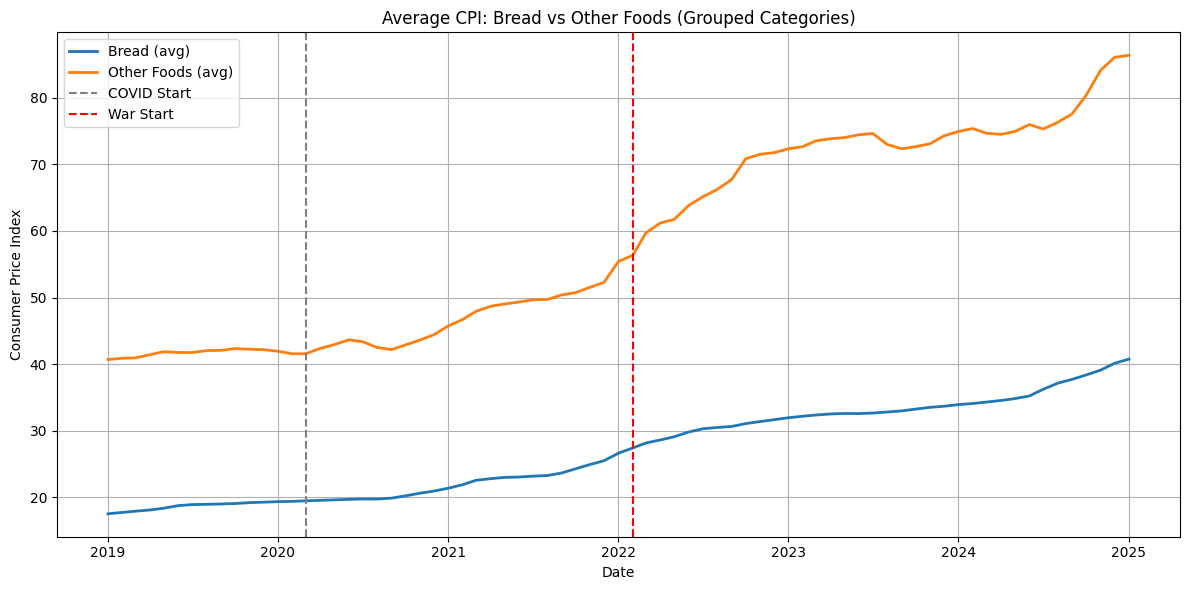

In [46]:
avg_cpi = df_long.groupby(["Date", "is_bread"])["CPI"].mean().unstack()

plt.figure(figsize=(12, 6))
plt.plot(avg_cpi.index, avg_cpi[1.0], label="Bread (avg)", linewidth=2)
plt.plot(avg_cpi.index, avg_cpi[0.0], label="Other Foods (avg)", linewidth=2)

# Mark events
plt.axvline(pd.to_datetime("2020-03-01"), color='gray', linestyle='--', label="COVID Start")
plt.axvline(pd.to_datetime("2022-02-01"), color='red', linestyle='--', label="War Start")

plt.title("Average CPI: Bread vs Other Foods (Grouped Categories)")
plt.xlabel("Date")
plt.ylabel("Consumer Price Index")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Report:

The pooled regression confirms that although all food categories saw price inflation during COVID-19 and the full-scale war, bread products experienced a significantly smaller increase. This is visible in both the coefficient on the Bread × War interaction term (−15.2, p < 0.001) and in the CPI trend plot, which shows a gradual but consistent rise in bread prices compared to the more volatile and pronounced surge in other foods.

Thus, Hypothesis 3.4.1 (2) is partially supported: bread did undergo a sustained price transformation, but not one more pronounced than other food groups.

## Hypothesis 3.4.1 (2)
Wheat and grain prices will demonstrate the most substantial price volatility due to disrupted agricultural production and export challenges.

1. We compute monthly price changes:
$$
\Delta \mathrm{CPI}_{i, t}=\mathrm{CPI}_{i, t}-\mathrm{CPI}_{i, t-1}
$$
2. We proceed with standard deviation of changes (volatility)
$$
\sigma_i=\operatorname{std}\left(\Delta \mathrm{CPI}_{i, t}\right)
$$
This metric quantifies volatility — higher values indicate more unstable pricing over time.

In [47]:
cpi_wide = df_long.pivot_table(index="Date", columns="Тип товарів і послуг", values="CPI")

# Step 1: Compute monthly CPI change (delta)
cpi_change = cpi_wide.diff()
# Step 2: Compute standard deviation of these changes = volatility
volatility = cpi_change.std().sort_values(ascending=False)

grain_volatility = volatility["Крупи"]
rank = (volatility > grain_volatility).sum() + 1  # 1-based ranking
vol_df = pd.DataFrame({
    "Category": volatility.index,
    "Volatility (σ)": volatility.values,
    "Rank": range(1, len(volatility) + 1)
})
vol_df.loc[vol_df["Category"] == "Крупи", "Rank"] = rank

print(vol_df)


                                         Category  Volatility (σ)  Rank
0                                            Яйця        5.341067     1
1                                           Овочі        3.515339     2
2                                          Яблука        2.843574     3
3                                            Риба        2.552754     4
4                                 Ковбасні вироби        2.333399     5
5                                        Картопля        2.333206     6
6                                             Сир        2.070725     7
7                 Мʼясо свійських тварин та птиці        1.714776     8
8                                Олія соняшникова        1.536723     9
9                                Молочні продукти        1.138488    10
10                                          Крупи        1.056463    11
11                                          Цукор        0.976184    12
12                                       Макарони        0.59946

## Result

Findings:
- Крупи (grains) had a volatility of 𝜎 = 1,05
- They ranked 11th out of 15 categories.

Higher volatility was observed in Яйця (eggs), Овочі (vegetables), and Яблука (apples).

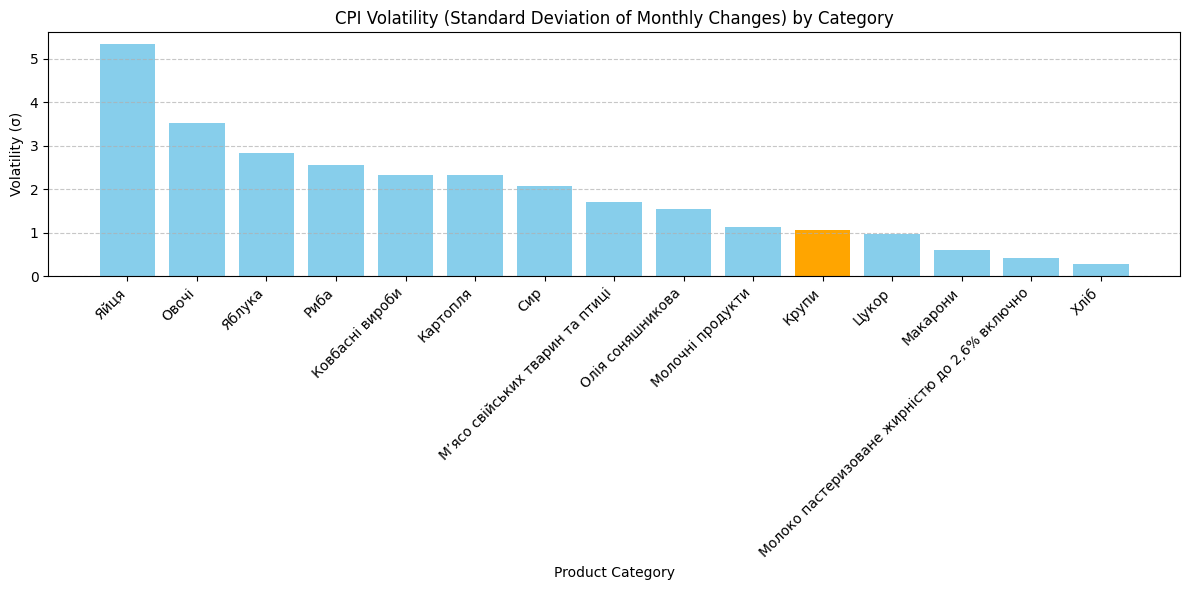

In [48]:
plt.figure(figsize=(12, 6))
bars = plt.bar(volatility.index, volatility.values, color=["orange" if cat == "Крупи" else "skyblue" for cat in volatility.index])

for bar in bars:
    if bar.get_label() == "Крупи" or bar.get_x() == volatility.index.get_loc("Крупи"):
        bar.set_color("orange")
        plt.text(bar.get_x(), bar.get_height() + 0.1, "Крупи", ha='center', va='bottom', fontweight='bold')

plt.title("CPI Volatility (Standard Deviation of Monthly Changes) by Category")
plt.ylabel("Volatility (σ)")
plt.xlabel("Product Category")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Report:

While grain prices showed moderate volatility, they were not the most volatile. Therefore, the hypothesis is not supported in this dataset. Products like eggs and fresh produce exhibited more significant pricing fluctuations, likely due to perishability and seasonal factors.

## Hypothesis 3.4.2

Food price inflation will demonstrate significant regional disparities.

Sub-claims:
- Border/conflict zones → more extreme price changes
- Agricultural regions → more stable pricing

Conflict Zones:
- Донецька
- Луганська
- Харківська
- Херсонська
- Запорізька

Agricultural Strongholds:
- Дніпропетровська
- Кіровоградська
- Одеська
- Вінницька
- Харківська

We'll now compute for each region:
1. Inflation rate:
$$
\text { Inflation }_r=\frac{\mathrm{CPI}_{r, \text { end }}-\mathrm{CPI}_{r, \text { start }}}{\mathrm{CPI}_{r, \text { start }}}
$$
2. Volatility:
$$
\sigma_r=\operatorname{std}\left(\Delta \mathrm{CPI}_{r, t}\right)
$$

And then:
- Compare conflict zones vs others
- Compare agricultural strongholds vs others

In [49]:
df_regions = df_long[df_long["Територіальний розріз"] != "Україна"]
cpi_region = df_regions.groupby(["Date", "Територіальний розріз"])["CPI"].mean().unstack()

start_cpi = cpi_region.iloc[0]
end_cpi = cpi_region.iloc[-1]
inflation_rate = ((end_cpi - start_cpi) / start_cpi) * 100
volatility = cpi_region.diff().std()

region_stats = pd.DataFrame({
    "Inflation (%)": inflation_rate,
    "Volatility (σ)": volatility
}).reset_index().rename(columns={"Територіальний розріз": "Region"})

# Tag conflict and agricultural zones
conflict_regions = ["Донецька", "Луганська", "Харківська", "Херсонська", "Запорізька"]
agri_regions = ["Дніпропетровська", "Кіровоградська", "Одеська", "Вінницька", "Харківська"]

region_stats["Conflict Zone"] = region_stats["Region"].isin(conflict_regions)
region_stats["Agricultural Zone"] = region_stats["Region"].isin(agri_regions)

print(region_stats)


               Region  Inflation (%)  Volatility (σ)  Conflict Zone  \
0   Івано-Франківська     115.172748        0.906824          False   
1           Волинська     132.218133        1.180827          False   
2           Вінницька     129.583840        1.088075          False   
3    Дніпропетровська     120.779446        1.075113          False   
4            Донецька      54.712284        1.014510           True   
5         Житомирська     115.514358        1.043175          False   
6        Закарпатська     118.244110        0.991727          False   
7          Запорізька     130.441770        1.225120           True   
8                Київ     117.451856        1.128493          False   
9            Київська     114.647960        1.151342          False   
10     Кіровоградська     112.122087        0.949107          False   
11          Луганська      32.068265        0.395081           True   
12          Львівська     124.293558        0.900482          False   
13    

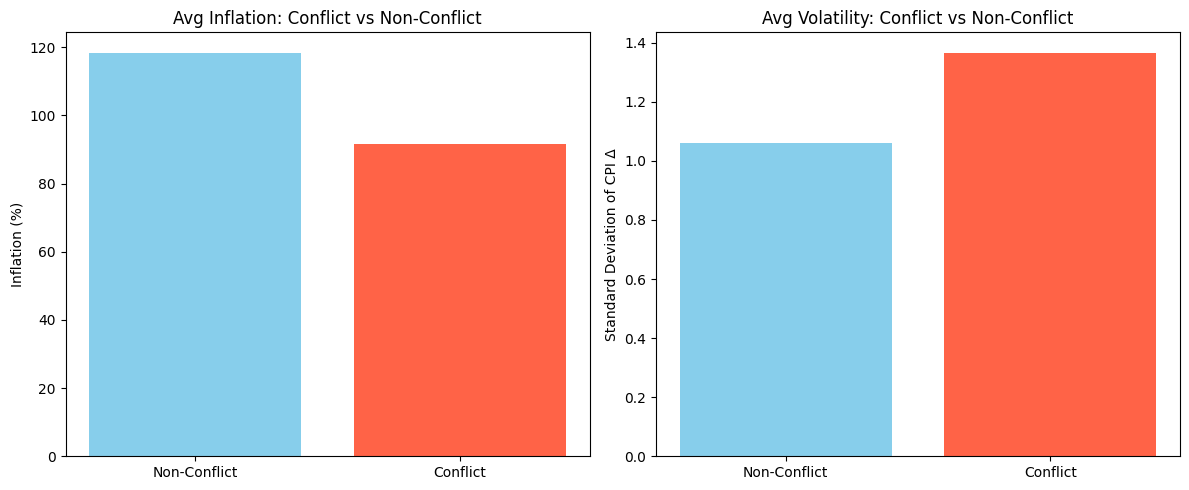

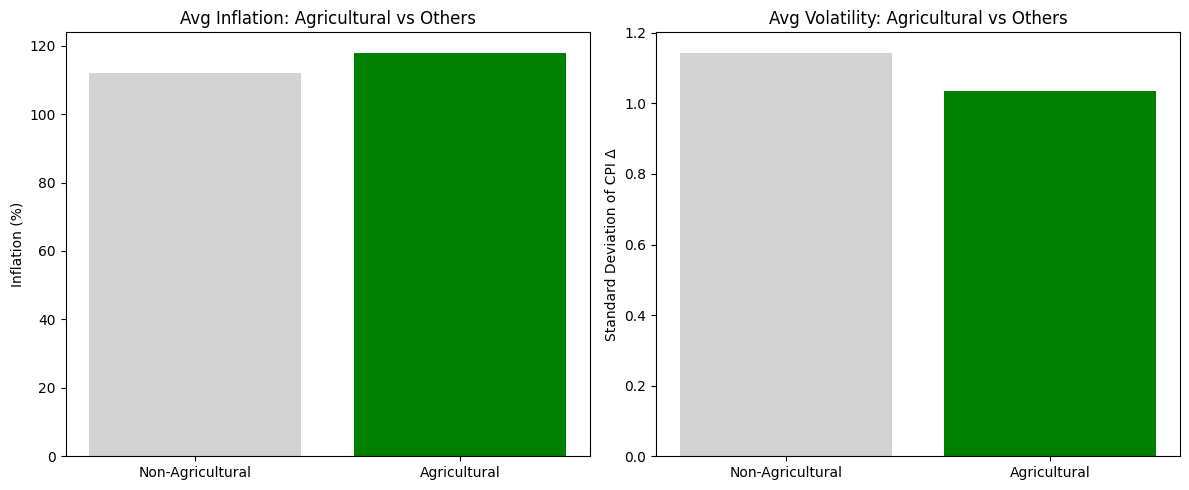

In [50]:
group_means = region_stats.groupby("Conflict Zone")[["Inflation (%)", "Volatility (σ)"]].mean()
group_agri = region_stats.groupby("Agricultural Zone")[["Inflation (%)", "Volatility (σ)"]].mean()

# Step 2: Plot Conflict vs Non-Conflict
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(["Non-Conflict", "Conflict"], group_means["Inflation (%)"], color=["skyblue", "tomato"])
plt.title("Avg Inflation: Conflict vs Non-Conflict")
plt.ylabel("Inflation (%)")

plt.subplot(1, 2, 2)
plt.bar(["Non-Conflict", "Conflict"], group_means["Volatility (σ)"], color=["skyblue", "tomato"])
plt.title("Avg Volatility: Conflict vs Non-Conflict")
plt.ylabel("Standard Deviation of CPI Δ")

plt.tight_layout()
plt.show()

# Step 3: Plot Agri vs Non-Agri
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(["Non-Agricultural", "Agricultural"], group_agri["Inflation (%)"], color=["lightgray", "green"])
plt.title("Avg Inflation: Agricultural vs Others")
plt.ylabel("Inflation (%)")

plt.subplot(1, 2, 2)
plt.bar(["Non-Agricultural", "Agricultural"], group_agri["Volatility (σ)"], color=["lightgray", "green"])
plt.title("Avg Volatility: Agricultural vs Others")
plt.ylabel("Standard Deviation of CPI Δ")

plt.tight_layout()
plt.show()

## Results

- Inflation is lower in conflict zones
→ likely due to missing data, limited supply, or market distortions
- Volatility is higher in conflict zones
→ confirms price instability and irregular fluctuations

Supports sub-claim:
Conflict zones experienced more volatile food pricing

- Inflation is slightly lower in agricultural regions
- Volatility is also slightly lower

Supports sub-claim (b):
Local production may have contributed to price stability

## Regressive analysis

We'll estimate:
$$
\mathrm{CPI}_{r, t}=\beta_0+\beta_1 \cdot \text { Conflict }_r+\beta_2 \cdot \text { Agricultural }_r+\beta_3 \cdot \mathrm{War}_t+\epsilon_{r, t}
$$

This allows us to test:
- Is CPI systematically higher or lower in conflict or agricultural zones?
- Does war timing impact CPI uniformly?

In [51]:
reg_data = df_regions.groupby(["Date", "Територіальний розріз"]).agg(CPI=("CPI", "mean")).reset_index()

# Merge conflict/agricultural tags
tags = region_stats[["Region", "Conflict Zone", "Agricultural Zone"]]
reg_data = reg_data.merge(tags, left_on="Територіальний розріз", right_on="Region", how="left")
reg_data["war"] = (reg_data["Date"] >= pd.to_datetime("2022-02-01")).astype(int)

X = reg_data[["Conflict Zone", "Agricultural Zone", "war"]].astype(float)
X = sm.add_constant(X)
y = reg_data["CPI"]

model = sm.OLS(y, X).fit()
summary_table = model.summary2().tables[1]
print(summary_table)

                       Coef.  Std.Err.           t     P>|t|     [0.025  \
const              43.289077  0.243482  177.791538  0.000000  42.811543   
Conflict Zone      -0.562295  0.387077   -1.452669  0.146488  -1.321457   
Agricultural Zone   0.287684  0.387077    0.743223  0.457443  -0.471477   
war                26.686338  0.309691   86.170912  0.000000  26.078952   

                      0.975]  
const              43.766611  
Conflict Zone       0.196867  
Agricultural Zone   1.046846  
war                27.293725  


## Report

To validate regional disparities in food price inflation, we estimated a pooled regression with the following specification:
$$
\mathrm{CPI}_{r, t}=\beta_0+\beta_1 \cdot \text { Conflict }_r+\beta_2 \cdot \text { Agricultural }_r+\beta_3 \cdot \mathrm{War}_t+\epsilon_{r, t}
$$

Results confirm a strong CPI shift post-war ( $\beta_3=+26.69, p<0.001$ ), but do not find statistically significant average differences between conflict or agricultural zones across the entire time frame. However, earlier volatility and inflation metrics did show group-level patterns, suggesting that while level differences are small, dynamics differ across regions.

Thus, Hypothesis 3.4.2 is partially supported: regional disparities in food prices exist, but manifest more clearly in volatility and local shocks than in absolute price levels.